## Setup

In [ ]:
import numpy as np
import os
from pathlib import Path
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


## This function uses the helpers/prompt function to extract concepts from text
from helpers.context_helpers import *
from helpers.utils import *


from helpers.visualizations_helpers import TextAnalyzer
from helpers.semantic_featurues_politics_library_calude import *

                       
## Input texts directory
input_documents_directory = Path(f"./datasets")


#1. Do you generate new Semantic Features? d
GENERATE_NEW_SEMANTIC_FEAUTURE = False

#2. Do you need the properties of the Semantic Features?
GENERATE_NEW_DVA_ANALYSIS = True


#SET semantic featuers
SEMANTIC_FEATURES = semantic_featurues_politics_sim_grooup_gemini_USED_IN_SIMULATUION
# SET path for the name simulation results!!!!!!
NAME_OF_SIMULATION = 'results/zminana_boxplot'
# SET path for the  path for the simulation results
RESULTS_PATH_NAME = "results/zminana_podpisu_results.json"


SVM_METHOD = False
if SVM_METHOD:
    MDS_METHOD = False
    print("Using MDS method!")
else:
    MDS_METHOD = True
    print("Using MDS method!")

print("All SETUP UP!")



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model all-MiniLM-L-v2 does not exist locally


No sentence-transformers model found with name sentence-transformers/all-MiniLM-L-v2. Creating a new one with mean pooling.


Error occurred: sentence-transformers/all-MiniLM-L-v2 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`
Using MDS method!
All SETUP UP!


## 1. Loading documents

In [2]:
from langchain.schema import Document

#dane polityczne


file_path = f"{input_documents_directory}/demo_repub_dataset.json"
political_texts = open_json_file(file_path)

# Convert to LangChain Document format, selecting only anti-vaccine articles
pages_democratics = [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"],
        }
    )
    for item in political_texts if item["isDemocratic"] 
]

# Convert to LangChain Document format, selecting only anti-vaccine articles
pages_republicans = [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"],
        }
    )
    for item in political_texts if not item["isDemocratic"] 
]

pages_all = [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"]
        }
    )
    for item in political_texts
]


#print(len(pages))
# Output transformed data
all_conent_from_pages = []
for doc in pages_all:
    # print(doc.page_content)
    # print()
    all_conent_from_pages.append(doc.page_content)
one_string_for_all_content  = "] [".join(all_conent_from_pages)



## Pages for each category


In [3]:


pages_government_role_strong_cat = [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"]
        }
    )
    for item in political_texts if item["government_role_strong"]  and item["government_role_strong"] is not None
]


pages_government_role_weak_cat = [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"]
        }
    )
    for item in political_texts if not item["government_role_strong"] and item["government_role_strong"] is not None
]


#effective
pages_social_policy_progressive_cat = [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"]
        }
    )
    for item in political_texts if  item["social_policy_progressive"] and item["social_policy_progressive"] is not None
]

pages_social_policy_traditional_cat= [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"]
        }
    )
    for item in political_texts if  not item["social_policy_progressive"] and item["social_policy_progressive"] is not None
]

pages_economic_policy_regulated_cat = [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"]
        }
    )
    for item in political_texts if item["economic_policy_regulated"] and item["economic_policy_regulated"] is not None
]

pages_economic_policy_free_market_cat = [
    Document(
        page_content=item["text"],
        page_wo_stop_words = None,  # Text of the document
        metadata={
            "title": item["title"],
            "source": item["source"],
            "isDemocratic": item["isDemocratic"],
            "government_role_strong": item["government_role_strong"],
            "social_policy_progressive": item["social_policy_progressive"],
            "economic_policy_regulated": item["economic_policy_regulated"]
        }
    )
    for item in political_texts if not item["economic_policy_regulated"] and item["economic_policy_regulated"] is not None
]



In [4]:


print(len(pages_all))
print(len(one_string_for_all_content))
print("pages_government_role_strong_cat: " , len(pages_government_role_strong_cat))
print("pages_government_role_weak_cat: " , len(pages_government_role_weak_cat))

print("pages_social_policy_progressive_cat: " , len(pages_social_policy_progressive_cat))
print("pages_social_policy_traditional_cat: " , len(pages_social_policy_traditional_cat))

print("pages_economic_policy_regulated_cat: " , len(pages_economic_policy_regulated_cat))
print("pages_economic_policy_free_market_cat: " , len(pages_economic_policy_free_market_cat))



print(len(pages_democratics))
print(len(pages_republicans))

# for page in pages_vaccine_efficacy_ineffective_cat:
#     print()
#     print(page.page_content)

99
46575
pages_government_role_strong_cat:  53
pages_government_role_weak_cat:  42
pages_social_policy_progressive_cat:  46
pages_social_policy_traditional_cat:  42
pages_economic_policy_regulated_cat:  28
pages_economic_policy_free_market_cat:  28
51
48


## 2. Create semantic features

In [ ]:


from helpers.semantic_multi_agent_definitions import *



# Klucze API - zastąp swoimi kluczami
API_KEYS = {
    "claude": "",
    "gemini": "",    
    "openai":  ""
}

# Główna konfiguracja
CONFIG_CLAUDE = {
    "provider": "claude",              # Domyślny provider: claude, gemini, openai
    "model": "claude-3-7-sonnet-20250219",     # Konkretny model (opcjonalne)
    #"model": "claude-sonnet-4-20250514",
    "context_len": int(len(pages_all)*1),                # Liczba kluczowych fragmentów
    "max_tokens": 10000,              # Maksymalna liczba tokenów
    "temperature": 0.0,               # Temperatura generacji (0.0-1.0)
    "output_file": "ALL_MFT_supervised_def_political_SONNET_3p7",    # Plik wyjściowy
    "save_results": True,
}

CONFIG_OPENAI = {
    "provider": "openai",              # Domyślny provider: claude, gemini, openai
    "model": "gpt-4o",     # Konkretny model (opcjonalne)
    "context_len": int(len(pages_all)*1),                # Liczba kluczowych fragm entów
    "max_tokens": 10000,              # Maksymalna liczba tokenów
    "temperature": 0.0,               # Temperatura generacji (0.0-1.0)
    "output_file": "results_political_GPT4o",    # Plik wyjściowy
    "save_results": True,
}


CONFIG_GEIMINI = {
    "provider": "gemini",              # Domyślny provider: claude, gemini, openai
    "model": "gemini-1.5-pro",     # Konkretny model (opcjonalne)
    "context_len": int(len(pages_all)*1),                # Liczba kluczowych fragmentów
    "max_tokens": 10000,              # Maksymalna liczba tokenów
    "temperature": 0.0,               # Temperatura generacji (0.0-1.0)
    "output_file": "results_politics_GEMINI1.5",    # Plik wyjściowy
    "save_results": True,
}

CONFIG = CONFIG_CLAUDE
def run_single_provider_analysis():
    """Uruchamia analizę z jednym providerem"""
    
    print("="*60)
    print("ANALIZA SEMANTYCZNA - JEDEN PROVIDER")
    print("="*60)
    
    # Pobierz konfigurację
    provider = CONFIG["provider"]
    print(provider)
    api_key = API_KEYS.get(provider)

    
    if not api_key:
        print(f"Błąd: Brak klucza API dla providera {provider}")
        print("Zaktualizuj API_KEYS w konfiguracji")
        return None
    
    # Pobierz tekst
    text = one_string_for_all_content
    
    print(f"Provider: {provider}")
    print(f"Model: {CONFIG.get('model', 'domyślny')}")
    print(f"Długość tekstu: {len(text)} znaków")
    print(f"Context length: {CONFIG_CLAUDE['context_len']}")
    print("-" * 40)
    

    IS_DEFINED_SEMANTIC_QUIALITIES = True
    if IS_DEFINED_SEMANTIC_QUIALITIES == True:
        DEFINED_SEMANTIC_QUALITIES = "Care/Harm, Fairness/Cheating, Loyalty/Betrayal, Authority/Subversion, Sanctity/Degradation, Liberty/Oppression"
        #DEFINED_SEMANTIC_QUALITIES = "government_role, social_policy, economic_policy"
    else:
        DEFINED_SEMANTIC_QUALITIES = None

    print("---> Defined semantic quialities: ", DEFINED_SEMANTIC_QUALITIES)

    # Uruchom analizę
    results = extract_semantic_concepts_with_agents(
        text=text,
        api_key=api_key,
        provider=provider,
        model=CONFIG.get("model"),
        context_len=CONFIG["context_len"],
        max_tokens=CONFIG["max_tokens"],
        temperature=CONFIG["temperature"],
        defined_semantic_domains=DEFINED_SEMANTIC_QUALITIES
    )
    
    # Zapisz wyniki
    if CONFIG["save_results"]:
        save_semantic_features(results, CONFIG["output_file"])
        print(f"\nWyniki zapisano do: {CONFIG['output_file']}")
    return results

GENERATE_NEW_SEMANTIC_FEAUTURE = True 

if GENERATE_NEW_SEMANTIC_FEAUTURE:
    for i in range(5):
        print("-" * 10)
        print("Iteracja: " , i)
        print("-" * 10)
        run_single_provider_analysis()


    

In [6]:



# import numpy as np
# from scipy.spatial.distance import cosine

# from helpers.polarization_2Dcassifier_embedings_neutral import *

# # Pseudo-funkcja do Gemini embeddings — zastąp własną implementacją
# def get_gemini_embedding(text: str) -> np.ndarray:
#     # TODO: podmień na faktyczne wywołanie Gemini API
#     return np.random.rand(384)

# def encode_texts_with_gemini(texts):
#     embeddings = []
#     for text in texts:
#         emb = generate_embedding(text=text)
#         embeddings.append(emb)
#     return np.vstack(embeddings)

# from sklearn.isotonic import spearmanr


# def spearman_similarity(vec1, vec2):
#     # Spearman wymaga rang, ale spearmanr przyjmuje raw dane — działa na nich wewnętrznie
#     correlation, _ = spearmanr(vec1, vec2)
#     return correlation

# # Funkcja do porównania par (pozytywna vs negatywna) z wszystkich wersji
# def find_most_different_positive_negative_pairs(positive_texts, negative_texts):
#     positive_emb = encode_texts_with_gemini(positive_texts)
#     negative_emb = encode_texts_with_gemini(negative_texts)
    
#     min_similarity = 1.0
#     min_pair = (None, None)
    
#     # Porównujemy każdą pozytywną wersję z każdą negatywną
#     for i, pos_vec in enumerate(positive_emb):
#         for j, neg_vec in enumerate(negative_emb):
#             sim = spearman_similarity(pos_vec, neg_vec)
#             if sim < min_similarity:
#                 min_similarity = sim
#                 min_pair = (i, j)
#     return min_pair, min_similarity


# def find_most_similar_positive_negative_pairs(positive_texts, negative_texts):
#     positive_emb = encode_texts_with_gemini(positive_texts)
#     negative_emb = encode_texts_with_gemini(negative_texts)
    
#     max_similarity = -1.0
#     max_pair = (None, None)
    
#     for i, pos_vec in enumerate(positive_emb):
#         for j, neg_vec in enumerate(negative_emb):
#             # sim = 1 - cosine(pos_vec, neg_vec)
#             sim = spearman_similarity(pos_vec, neg_vec)

#             if sim > max_similarity:
#                 max_similarity = sim
#                 max_pair = (i, j)
#     return max_pair, max_similarity

# # Funkcja do zebrania tekstów dla kluczy pozytywnych i negatywnych w danej domenie z wszystkich wersji v1..v25
# def collect_texts_for_keys(pos_key, neg_key):
#     positive_texts = []
#     negative_texts = []
#     for i in range(1, QUANTITY_OF_SEMANTIC_FEATURES):
#         data = globals()[f'semantic_features_v{i}']
#         positive_texts.append(data[pos_key][0])
#         negative_texts.append(data[neg_key][0])
#     return positive_texts, negative_texts

# coronavirus_domains = {
#     'safety': ('vaccine_safety_beneficial', 'vaccine_safety_harmful'),
#     'efficacy': ('vaccine_efficacy_effective', 'vaccine_efficacy_ineffective'),
#     'obligation': ('vaccination_obligation_beneficial', 'vaccination_obligation_harmful')

# }


# political_domains = {
#     'government_role': ('government_role_strong', 'government_role_weak'),
#     'social_policy': ('social_policy_progressive', 'social_policy_traditional'),
#     'economic_policy': ('economic_policy_regulated', 'economic_policy_free_market'),
# }



# QUANTITY_OF_SEMANTIC_FEATURES = 50
# for domain, (pos_key, neg_key) in political_domains.items():
#     pos_features = []
#     neg_features = []
#     print(f"\n--- DOMAIN: {domain.upper()} ---")
#     pos_texts, neg_texts = collect_texts_for_keys(pos_key, neg_key)
#     # if domain == 'government_role':
#     #     continue 
#     # if domain == 'social_policy':
#     #     continue
#     for i in range(10):
#     # if True:
#         (pos_idx, neg_idx), similarity = find_most_similar_positive_negative_pairs(pos_texts, neg_texts)
#         print(f"Most different positive-negative pair:")
#         print(f"Spearman coleration: {similarity:.4f}")
#         print(f"Positive (v{pos_idx+1}):")
#         print(f"Negative (v{neg_idx+1}):")
#         print(f"[\"{pos_texts[pos_idx]}\"],")
#         print(f"[\"{neg_texts[neg_idx]}\"],")
#         pos_features.append(pos_texts[pos_idx])
#         neg_features.append(neg_texts[neg_idx])
#         pos_texts.pop(pos_idx)
#         neg_texts.pop(neg_idx)
#     print(f"\n--- DOMAIN: {domain.upper()} ---")
#     print("="*60)

#     print("positive")
#     print(pos_features)
#     print("="*30)

#     print("negative")
#     print(neg_features)
#     print("="*60)

#     output_file = "wyniki_podobne_osie_polityczne_llama_18.txt"

#     with open(output_file, "a", encoding="utf-8") as f:
#         f.write(f"\n--- DOMAIN: {domain.upper()} ---\n")
#         f.write("="*60 + "\n")

#         f.write("positive\n")
#         f.write(str(pos_features) + "\n")
#         f.write("="*30 + "\n")

#         f.write("negative\n")
#         f.write(str(neg_features) + "\n")
#         f.write("="*60 + "\n")



## Input texts stats

In [8]:
import math
from collections import Counter

def calculate_text_stats(texts_list):
    """
    Oblicza statystyki dla listy tekstów:
    - CTTR (Corrected Type-Token Ratio): średni, maksymalny, minimalny, mediana
    - Entropia: średnia, maksymalna, minimalna, mediana
    
    CTTR = unique_words / sqrt(2 * total_words)
    Entropia = -suma(p_i * log2(p_i)) dla każdego słowa i, gdzie p_i to prawdopodobieństwo wystąpienia słowa
    
    Args:
        texts_list (list): Lista stringów, gdzie każdy string to oddzielny tekst.
        
    Returns:
        dict: Słownik zawierający statystyki CTTR i entropii
    """
    if not texts_list:
        return {
            "cttr": {"avg": 0.0, "max": 0.0, "min": 0.0, "median": 0.0},
            "entropy": {"avg": 0.0, "max": 0.0, "min": 0.0, "median": 0.0},
            "details": []
        }
    
    cttr_values = []
    entropy_values = []
    details = []
    
    for text in texts_list:
        # Tokenizacja tekstu (prosta implementacja - podział po białych znakach)
        words = text.lower().split()
        
        # Obliczenie liczby słów i unikalnych słów
        total_words = len(words)
        unique_words = len(set(words))
        
        # Obliczenie CTTR
        if total_words == 0:
            cttr = 0.0
        else:
            cttr = unique_words / math.sqrt(2 * total_words)
        
        # Obliczenie entropii
        if total_words == 0:
            entropy = 0.0
        else:
            # Liczenie wystąpień każdego słowa
            word_counts = Counter(words)
            
            # Obliczenie prawdopodobieństwa wystąpienia każdego słowa
            probabilities = [count / total_words for count in word_counts.values()]
            
            # Obliczenie entropii (w bitach, używając logarytmu o podstawie 2)
            entropy = -sum(p * math.log2(p) for p in probabilities)
        
        cttr_values.append(cttr)
        entropy_values.append(entropy)
        
        # Zapisanie szczegółów dla każdego tekstu
        details.append({
            "total_words": total_words,
            "unique_words": unique_words,
            "cttr": cttr,
            "entropy": entropy,
            "preview": " ".join(words[:10]) + ("..." if len(words) > 10 else "")
        })
    
    # Obliczenie statystyk dla CTTR
    cttr_stats = {
        "avg": sum(cttr_values) / len(cttr_values),
        "max": max(cttr_values),
        "min": min(cttr_values),
        "median": calculate_median(cttr_values)
    }
    
    # Obliczenie statystyk dla entropii
    entropy_stats = {
        "avg": sum(entropy_values) / len(entropy_values),
        "max": max(entropy_values),
        "min": min(entropy_values),
        "median": calculate_median(entropy_values)
    }
    
    return {
        "cttr": cttr_stats,
        "entropy": entropy_stats,
        "details": details
    }

def calculate_median(values):
    """
    Oblicza medianę z listy wartości.
    
    Args:
        values (list): Lista wartości liczbowych
        
    Returns:
        float: Mediana listy
    """
    sorted_values = sorted(values)
    n = len(sorted_values)
    if n % 2 == 0:
        return (sorted_values[n//2-1] + sorted_values[n//2]) / 2
    else:
        return sorted_values[n//2]

# Przykład użycia funkcji
def demonstrate_text_analysis():
    # Przykładowe teksty z różnym bogactwem leksykalnym i różną entropią


    stats = calculate_text_stats(all_conent_from_pages)
    
    print("Statystyki zbiorcze:")
    print("\nCTTR:")
    print(f"  Średni: {stats['cttr']['avg']:.4f}")
    print(f"  Maksymalny: {stats['cttr']['max']:.4f}")
    print(f"  Minimalny: {stats['cttr']['min']:.4f}")
    print(f"  Mediana: {stats['cttr']['median']:.4f}")
    
    print("\nEntropia:")
    print(f"  Średnia: {stats['entropy']['avg']:.4f}")
    print(f"  Maksymalna: {stats['entropy']['max']:.4f}")
    print(f"  Minimalna: {stats['entropy']['min']:.4f}")
    print(f"  Mediana: {stats['entropy']['median']:.4f}")
    
    print("\nSzczegółowa analiza każdego tekstu:")
    for i, detail in enumerate(stats['details'], 1):
        print(f"Tekst {i}:")
        print(f"  Liczba słów: {detail['total_words']}")
        print(f"  Liczba unikalnych słów: {detail['unique_words']}")
        print(f"  CTTR: {detail['cttr']:.4f}")
        print(f"  Entropia: {detail['entropy']:.4f} bitów")
        print(f"  Początek: {detail['preview']}")
        print()

# Wywołanie demonstracji
demonstrate_text_analysis()

Statystyki zbiorcze:

CTTR:
  Średni: 4.5123
  Maksymalny: 6.4348
  Minimalny: 2.5495
  Mediana: 4.6188

Entropia:
  Średnia: 5.4533
  Maksymalna: 6.5605
  Minimalna: 3.7004
  Mediana: 5.5527

Szczegółowa analiza każdego tekstu:
Tekst 1:
  Liczba słów: 134
  Liczba unikalnych słów: 96
  CTTR: 5.8641
  Entropia: 6.2999 bitów
  Początek: the democratic party (whose logo is a donkey) generally represents...

Tekst 2:
  Liczba słów: 124
  Liczba unikalnych słów: 87
  CTTR: 5.5245
  Entropia: 6.0969 bitów
  Początek: furthermore, democrats to some degree support government-funded healthcare and the...

Tekst 3:
  Liczba słów: 80
  Liczba unikalnych słów: 62
  CTTR: 4.9015
  Entropia: 5.8281 bitów
  Początek: simply put, it is too hard to raise young children...

Tekst 4:
  Liczba słów: 32
  Liczba unikalnych słów: 30
  CTTR: 3.7500
  Entropia: 4.8750 bitów
  Początek: working-class and college-educated voters support progressive economic policies such as...

Tekst 5:
  Liczba słów: 62
  Lic

## 3. Quality of semantic categories

In [9]:
from helpers.category_semantic_analyzer import *


analyzer = TextAnalyzer(remove_stopwords=True)


# Analiza wszystkich kategorii
results = analyzer.analyze_all_categories(SEMANTIC_FEATURES)

# Obliczanie macierzy JSD
jsd_matrix = analyzer.calculate_jsd_matrix(results)

# Wypisanie wyników w formie tabeli
analyzer.print_metrics_table(results, name_of_the_file=NAME_OF_SIMULATION)

# Wypisanie macierzy JSD
analyzer.print_jsd_matrix(jsd_matrix)

# Wypisanie słów kluczowych
analyzer.print_key_words(results, name_of_the_file=NAME_OF_SIMULATION)




===== MACIERZ JENSEN-SHANNON DIVERGENCE =====
(Miara podobieństwa między rozkładami TF-IDF, niższe wartości = większe podobieństwo)
Kategoria | economic_pol.. | economic_pol.. | government_r.. | government_r.. | social_polic.. | social_polic..
----------------------------------------------------------------------------------------------------------------
economic_pol.. | 0.0000         | 0.5811         | 0.6377         | 0.5095         | 0.7817         | 0.7447        
economic_pol.. | 0.5811         | 0.0000         | 0.5142         | 0.7137         | 0.6717         | 0.7544        
government_r.. | 0.6377         | 0.5142         | 0.0000         | 0.5764         | 0.5973         | 0.7112        
government_r.. | 0.5095         | 0.7137         | 0.5764         | 0.0000         | 0.7509         | 0.6729        
social_polic.. | 0.7817         | 0.6717         | 0.5973         | 0.7509         | 0.0000         | 0.5393        
social_polic.. | 0.7447         | 0.7544         | 0.711

In [10]:
print(SEMANTIC_FEATURES)

{'government_role_strong': ['The government role strong pole represents the belief that ACTIVE GOVERNMENT INTERVENTION is necessary for societal wellbeing, characterized by ROBUST REGULATIONS, EXPANDED PUBLIC SERVICES, and CENTRALIZED AUTHORITY. Key indicators include support for COMPREHENSIVE WELFARE PROGRAMS, PROGRESSIVE TAXATION systems, STRONG FEDERAL OVERSIGHT of markets and industries, advocacy for GOVERNMENT-LED SOLUTIONS to social problems, and the fundamental view that COLLECTIVE ACTION through government institutions is essential for addressing inequality and ensuring EQUITABLE DISTRIBUTION of resources across society.', 'The government role strong pole represents perspectives advocating for SUBSTANTIAL GOVERNMENT INVOLVEMENT in economic and social affairs, characterized by support for COMPREHENSIVE REGULATION of business activities, EXTENSIVE PUBLIC PROGRAMS addressing societal needs, ACTIVE INTERVENTION in markets to ensure fairness, ROBUST SAFETY NETS for vulnerable popula

----> Przetwarzanie government_role_strong: 10 tekstów
  Tekst 1/10: The government role strong pole represents the bel...
----> generate_embedding_gemini
    - Wygenerowano embedding o wymiarze 3072
  Tekst 2/10: The government role strong pole represents perspec...
----> generate_embedding_gemini
    - Wygenerowano embedding o wymiarze 3072
  Tekst 3/10: The government role strong pole represents the bel...
----> generate_embedding_gemini
    - Wygenerowano embedding o wymiarze 3072
  Tekst 4/10: The government role strong pole represents the bel...
----> generate_embedding_gemini
    - Wygenerowano embedding o wymiarze 3072
  Tekst 5/10: The government role strong pole represents the bel...
----> generate_embedding_gemini
    - Wygenerowano embedding o wymiarze 3072
  Tekst 6/10: The government role strong pole represents the bel...
----> generate_embedding_gemini
    - Wygenerowano embedding o wymiarze 3072
  Tekst 7/10: The government role strong pole represents the bel...
----> g

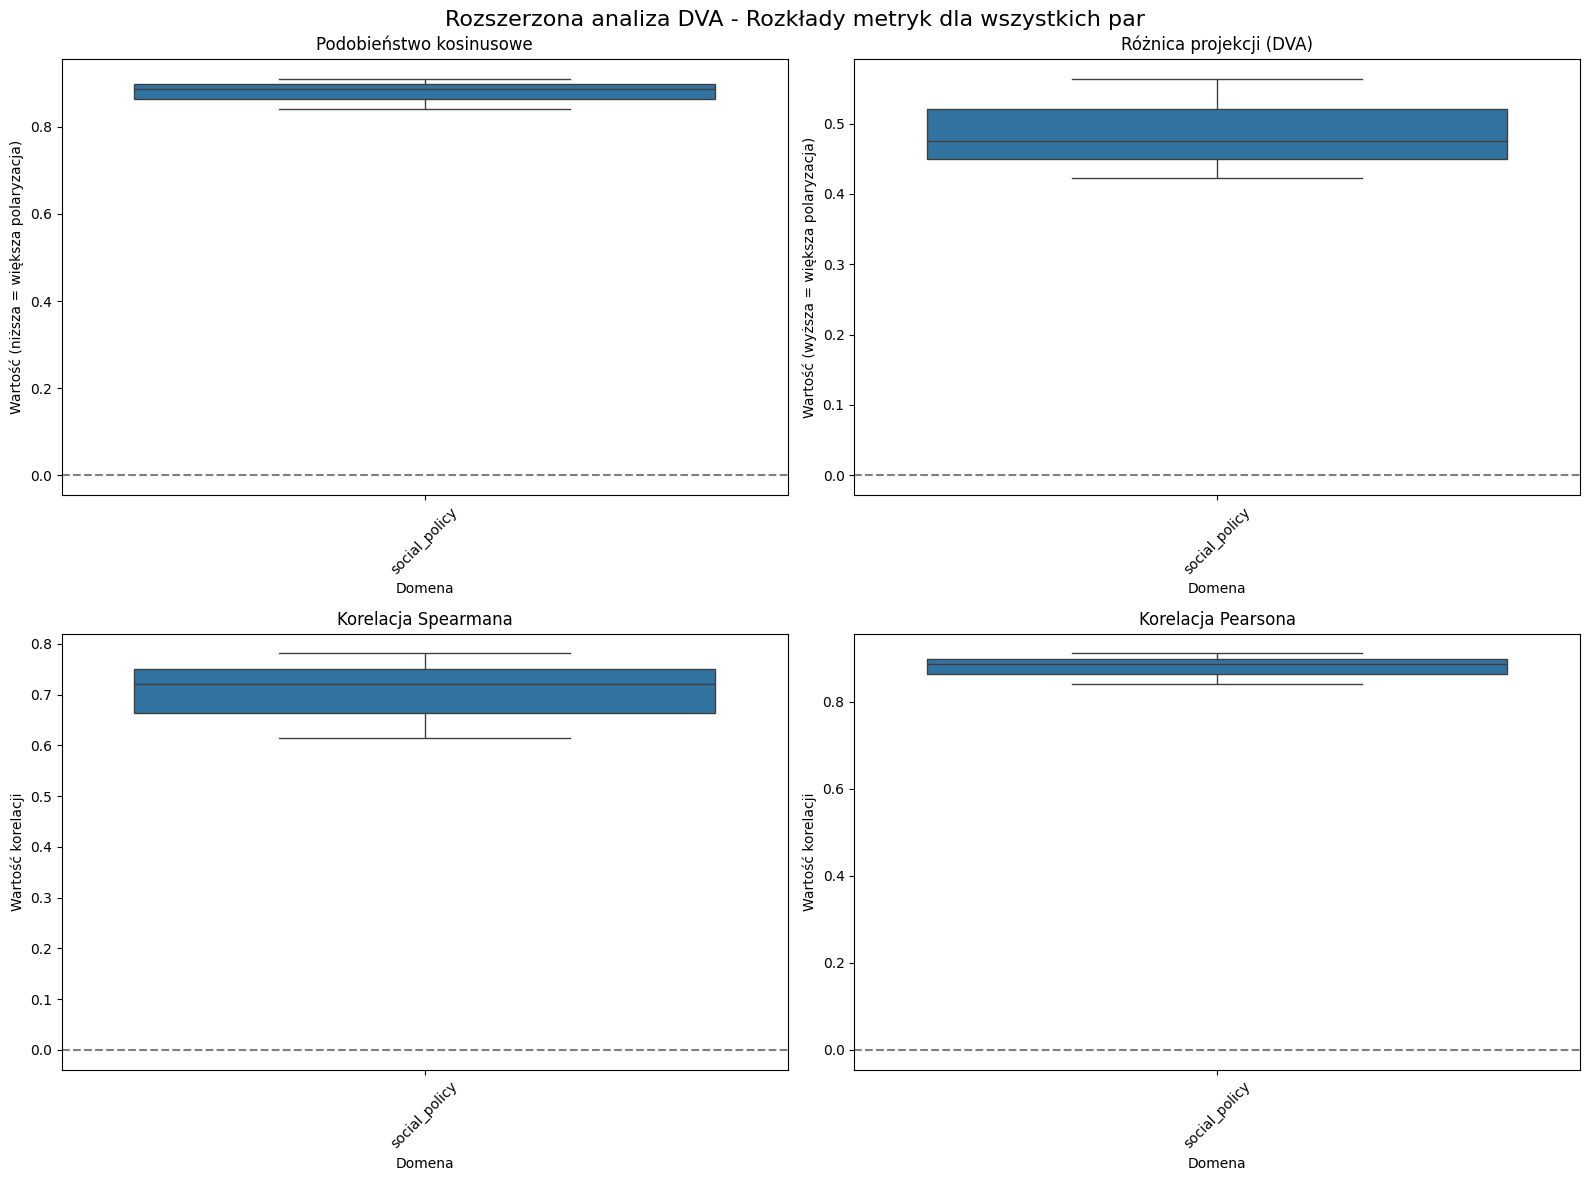

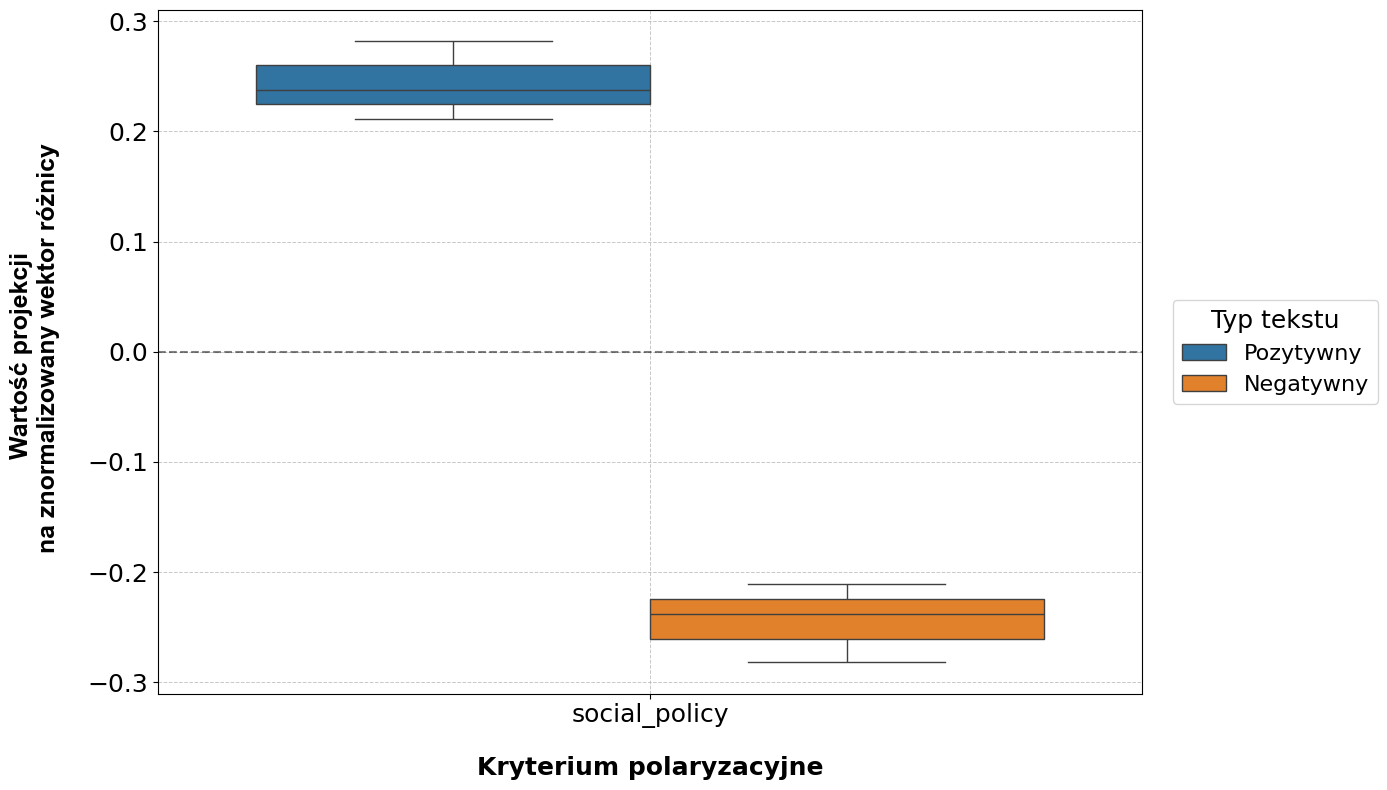

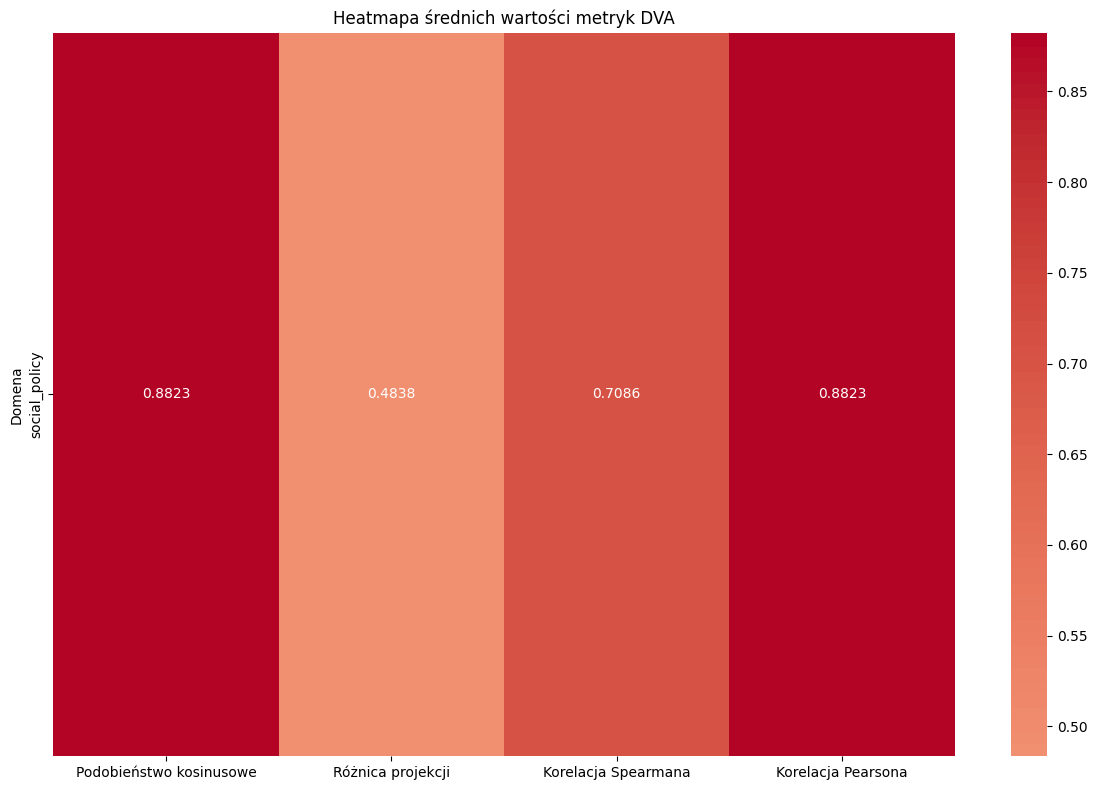

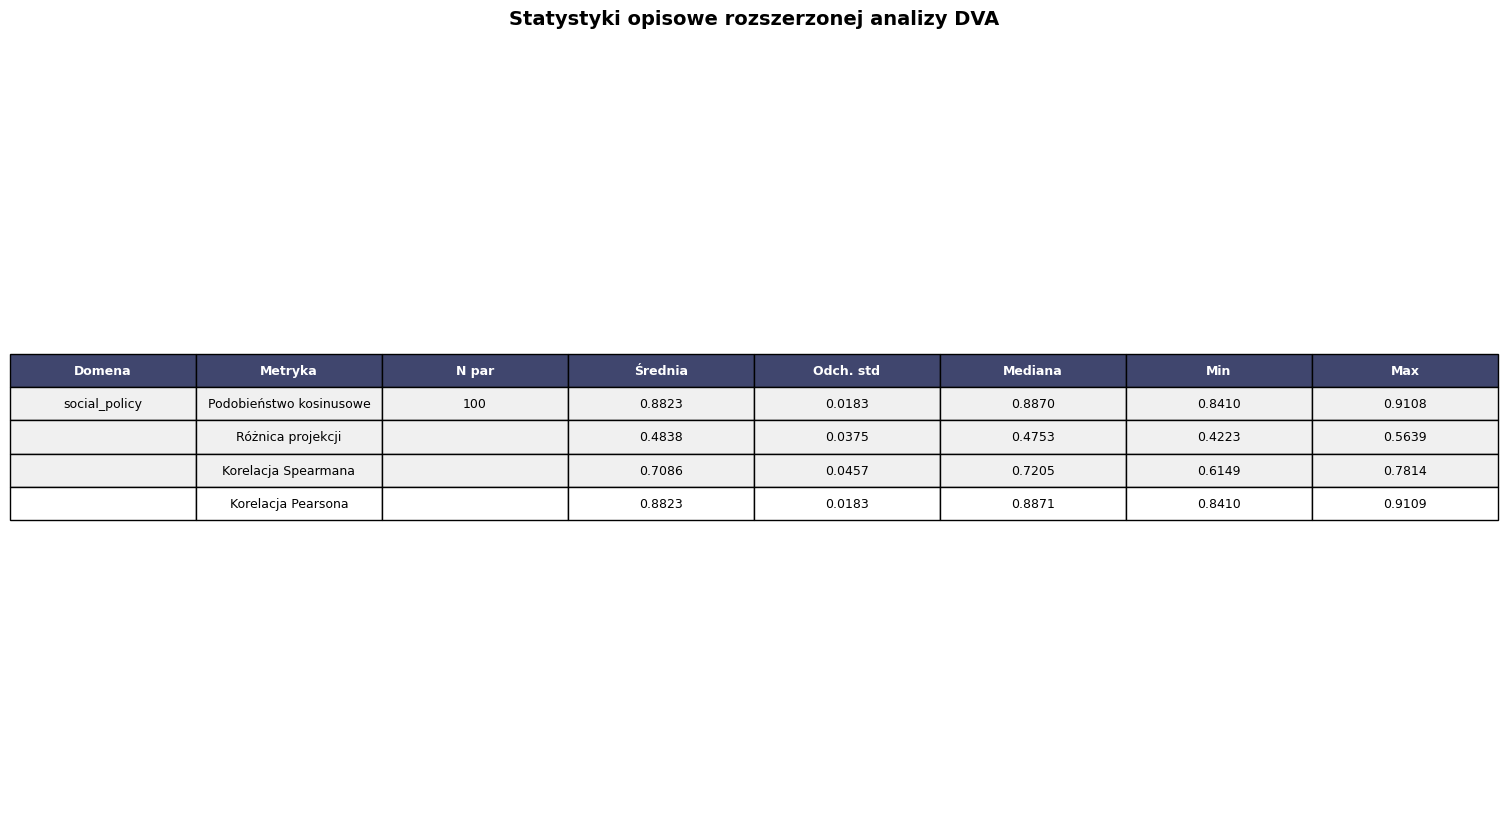

In [11]:
#from helpers.dva import *
from sympy import true
from helpers.dva_group import *
from helpers.semantic_features_library import *



# Przeprowadź analizę
if GENERATE_NEW_DVA_ANALYSIS:
    # Wykonaj analizęxs
    perform_extended_dva_analysis(SEMANTIC_FEATURES, method='gemini', name_of_the_results=NAME_OF_SIMULATION) 
    #perform_extended_dva_analysis(SEMANTIC_FEATURES, method='openai', name_of_the_results=NAME_OF_SIMULATION) 
    #perform_extended_dva_analysis(SEMANTIC_FEATURES, method='voyage', name_of_the_results=NAME_OF_SIMULATION)
    #perform_extended_dva_analysis(SEMANTIC_FEATURES, name_of_the_results=NAME_OF_SIMULATION)       









In [12]:
stop

NameError: name 'stop' is not defined

## Results variables

In [ ]:
# Tworzenie kopii słownika semantic_features
results_per_feature = SEMANTIC_FEATURES.copy()
result_pages_per_feture = SEMANTIC_FEATURES.copy()

# Dodawanie kategorii _balanced do każdej głównej kategorii
for main_category in list(SEMANTIC_FEATURES.keys()):
    base_category = main_category.split('_')[0] + '_' + main_category.split('_')[1]
    balanced_key = f"{base_category}_balanced"
    
    # Sprawdzenie czy kategoria _balanced już istnieje
    if balanced_key not in results_per_feature:
        results_per_feature[balanced_key] = []
        result_pages_per_feture[balanced_key] = []

# Inicjalizacja pustych list dla wszystkich cech
for feature in results_per_feature:
    results_per_feature[feature] = []
    result_pages_per_feture[feature] = []
    print(results_per_feature[feature])



[]
[]
[]
[]
[]
[]
[]
[]
[]


# 4. Semantic Polarization

## SVM Method

In [ ]:
from helpers.svm_polarization import *


if SVM_METHOD:
    results_metrics = []  # Lista do przechowywania wszystkich metryk


    polarizer = SVMPolarizer(
            random_seed=42,  # Kernel liniowy dla interpretacji współczynników
            embedding_api = 'openai'     
        )
        
        # Ustawienie kategorii semantycznych
    polarizer.set_semantic_features(SEMANTIC_FEATURES)


    print("✅ Kategorie semantyczne ustawione i osie zidentyfikowane")

    # 3. Trenowanie modeli SVM
    print("\n🏋️ Krok 3: Trenowanie modeli SVM dla każdej osi")

    polarizer.train()
    print("✅ Wszystkie modele SVM zostały wytrenowane")


    all_results = {}

    for i, page_for_analysis in enumerate(pages_all):
        results = polarizer.calculate_polarization(text=page_for_analysis.page_content)
        # Obliczenie polaryzacji
        all_results[f"tekst_{i}"] = results
        print(" ----> Analizowany teskt nr: ", i)

        for axis_name, axis_result in results.items():
        # Pobierz etykietę kierunku (np. "logika_positive" lub "emocje_negative")
            feature_name = axis_result['direction_label']
            results_per_feature[feature_name].append(axis_result['direction'])
            result_pages_per_feture[feature_name].append(page_for_analysis)
            # Zapisanie metryk do późniejszej analizy
            results_metrics.append({
                'page': page_for_analysis,
                'axis_name': axis_name,
                'feature_name': feature_name,
                'predicted_value': axis_result['direction_label'],
                'ground_truth_government_role': page_for_analysis.metadata.get('government_role_strong', None),  # Zakładam, że metadane są dostępne jako atrybut
                'ground_truth_social_policy': page_for_analysis.metadata.get('social_policy_progressive', None),  # Zakładam, że metadane są dostępne jako atrybut
                'ground_truth_economic_policy': page_for_analysis.metadata.get('economic_policy_regulated', None)  # Zakładam, że metadane są dostępne jako atrybut
            })

        
    # Wizualizacja dla pierwszego tekstu
    first_results = list(all_results.values())[0]

    print("✅ Konic badania")

## MDS Method

Konfiguracja embedingów: model=None, host=localhost, port=11434
Ustawiono 6 kategorii semantycznych:
  government_role_strong: 1 fraz
    - The government role strong pole represents the bel...
  government_role_weak: 1 fraz
    - The government role weak pole represents the belie...
  social_policy_progressive: 1 fraz
    - The social policy progressive pole represents supp...
  social_policy_traditional: 1 fraz
    - The social policy traditional pole represents adhe...
  economic_policy_regulated: 1 fraz
    - The economic policy regulated pole represents beli...
  economic_policy_free_market: 1 fraz
    - The economic policy free market pole represents co...
Zidentyfikowano oś semantyczną: government_role
  Biegun pozytywny: government_role_strong
  Biegun negatywny: government_role_weak
Zidentyfikowano oś semantyczną: social_policy
  Biegun pozytywny: social_policy_progressive
  Biegun negatywny: social_policy_traditional
Zidentyfikowano oś semantyczną: economic_policy
  Biegun po

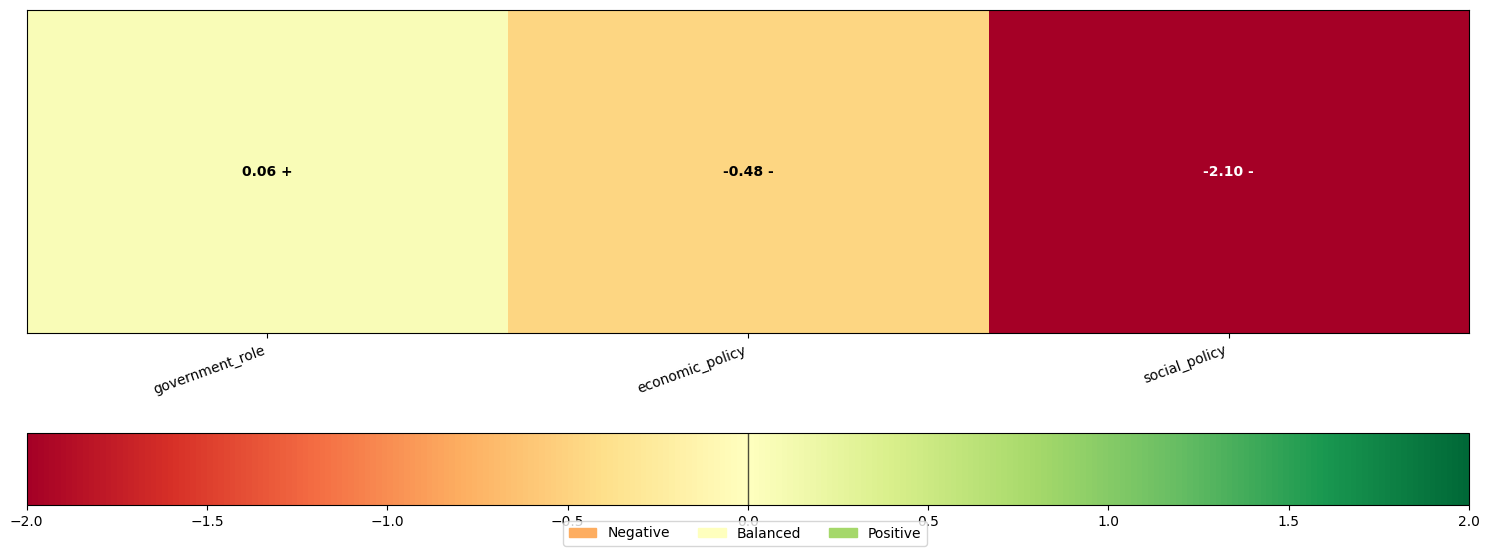

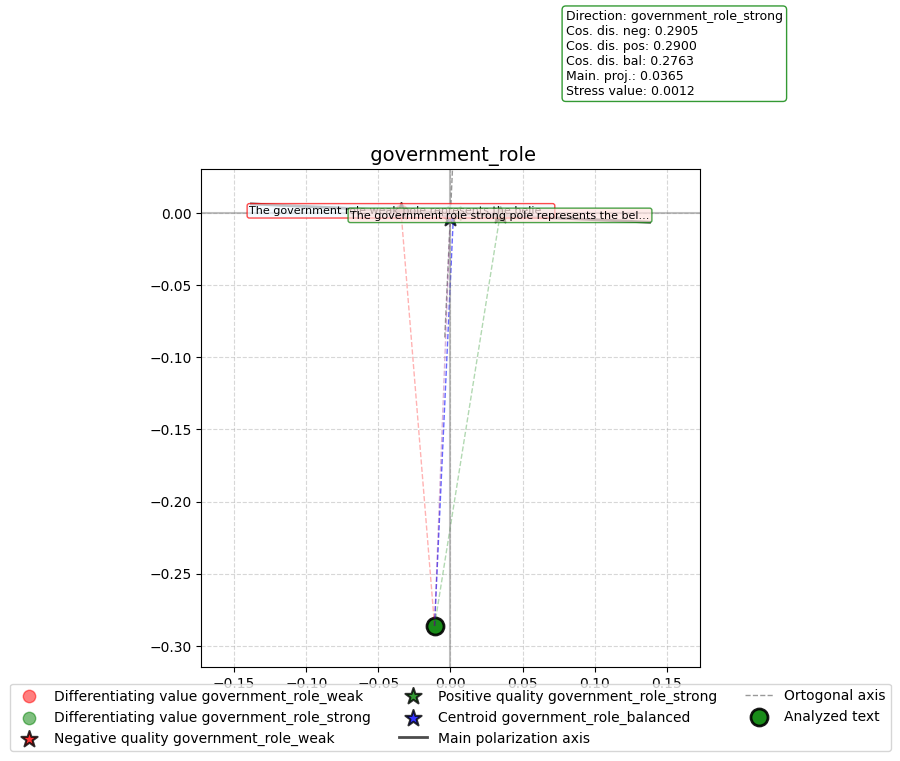

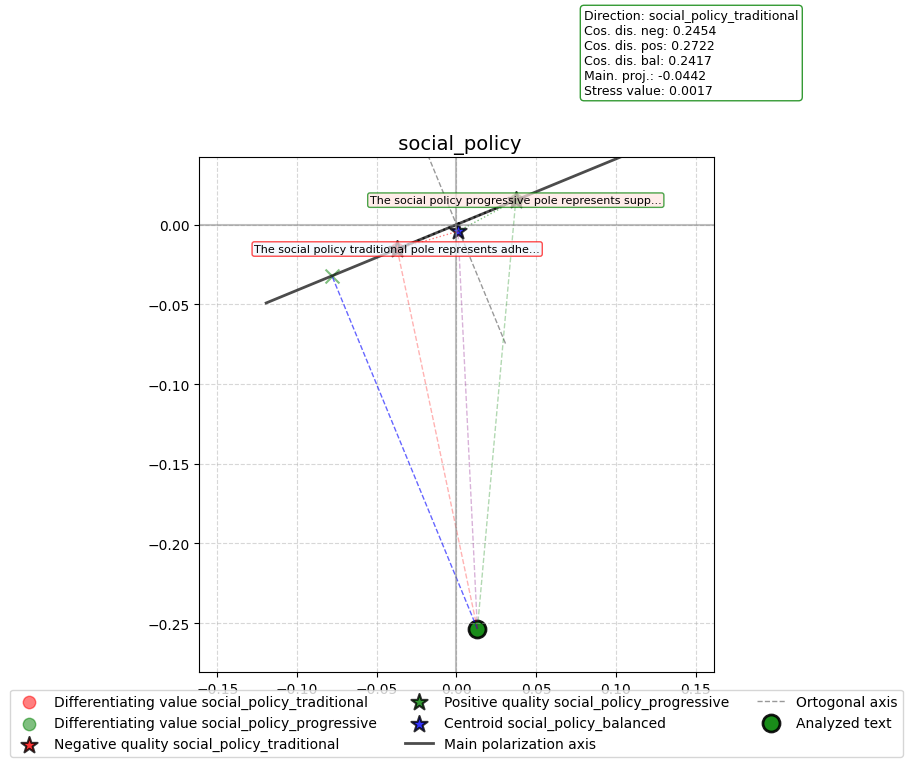

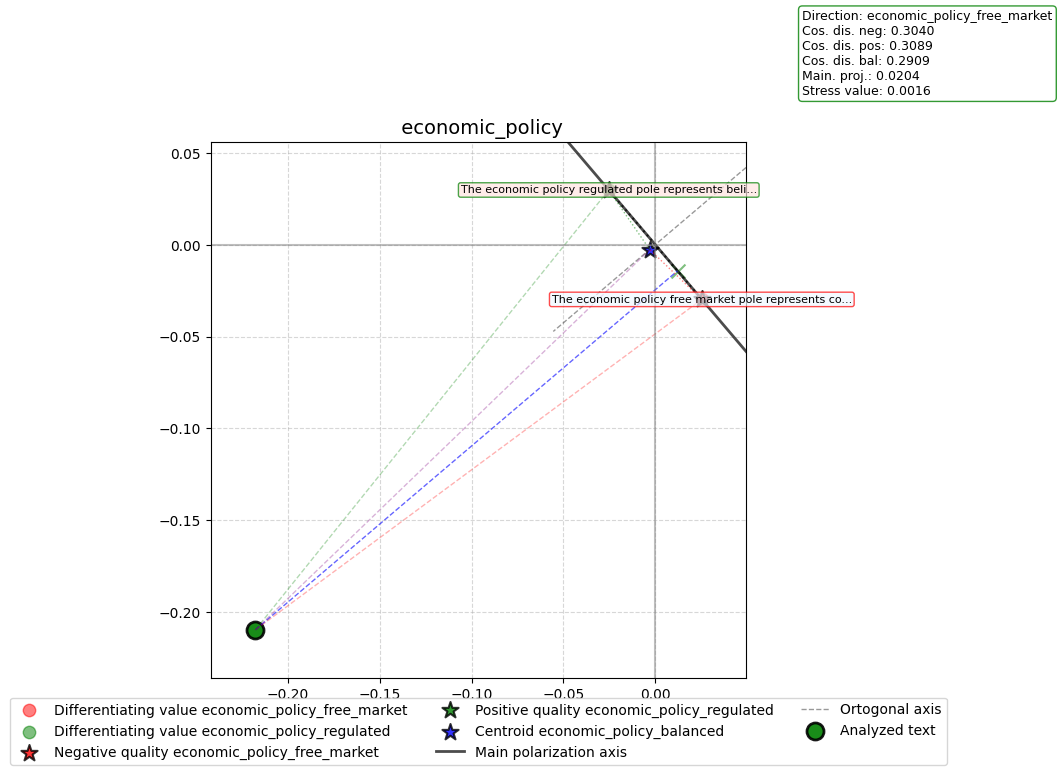

In [ ]:
from time import sleep
from helpers.polarization_2Dcassifier_embedings_neutral import *



if MDS_METHOD:

    results_metrics = []  # Lista do przechowywania wszystkich metryk


    polarizer = MultiAxisSemanticPolarizer(
        embedding_model=None,
        host="localhost",
        port=11434,
        normalize_embeddings=True
    )

    polarizer.set_semantic_features(SEMANTIC_FEATURES).train()


    for i, page_for_analysis in enumerate(pages_all):
        # Utworzenie instancji polaryzatora
        #text_to_debug = f"""{page_for_analysis.page_content}"""

        # embedding_phrase_for_clasifitaion = compute_embedding_with_ollama(text_to_debug, MODEL_TO_USE)
        
        # Obliczenie polaryzacji
        results = polarizer.calculate_polarization_mds(text=page_for_analysis.page_content)

        # Zapisanie modelu
        polarizer.save_model("semantic_polarizer_model.json")
        print("-----> Analizowany tekst nr: ", i)

        for axis_name, axis_result in results.items():
        # Pobierz etykietę kierunku (np. "logika_positive" lub "emocje_negative")
            feature_name = axis_result['direction_label']
            results_per_feature[feature_name].append(axis_result['direction'])
            result_pages_per_feture[feature_name].append(page_for_analysis)
            # Zapisanie metryk do późniejszej analizy
            results_metrics.append({
                'page': page_for_analysis,
                'axis_name': axis_name,
                'feature_name': feature_name,
                'predicted_value': axis_result['direction_label'],
                'ground_truth_government_role': page_for_analysis.metadata.get('government_role_strong', None),  # Zakładam, że metadane są dostępne jako atrybut
                'ground_truth_social_policy': page_for_analysis.metadata.get('social_policy_progressive', None),  # Zakładam, że metadane są dostępne jako atrybut
                'ground_truth_economic_policy': page_for_analysis.metadata.get('economic_policy_regulated', None)  # Zakładam, że metadane są dostępne jako atrybut
        })
            
    # Wizualizacja wyników
    fig = plot_polarization_heatmap_mds(
    results=results,
    title=f"",
    output_path=f"polaryzacja.png"
    )

    # Wizualizacja dla pierwszej osi
    for axis_name in results.keys():
        plot_semantic_axis_2d_mds(
            axis_name=axis_name,
            result=results[axis_name],
            title=f" {axis_name}",
            output_path=f"os_{axis_name}_.png"
        )

### Save to results to a file

In [ ]:
import json


import pandas as pd
df = pd.DataFrame(results_metrics)

df.to_json(RESULTS_PATH_NAME, orient='records', indent=4, force_ascii=False)


## Confusion matrix - all metrics

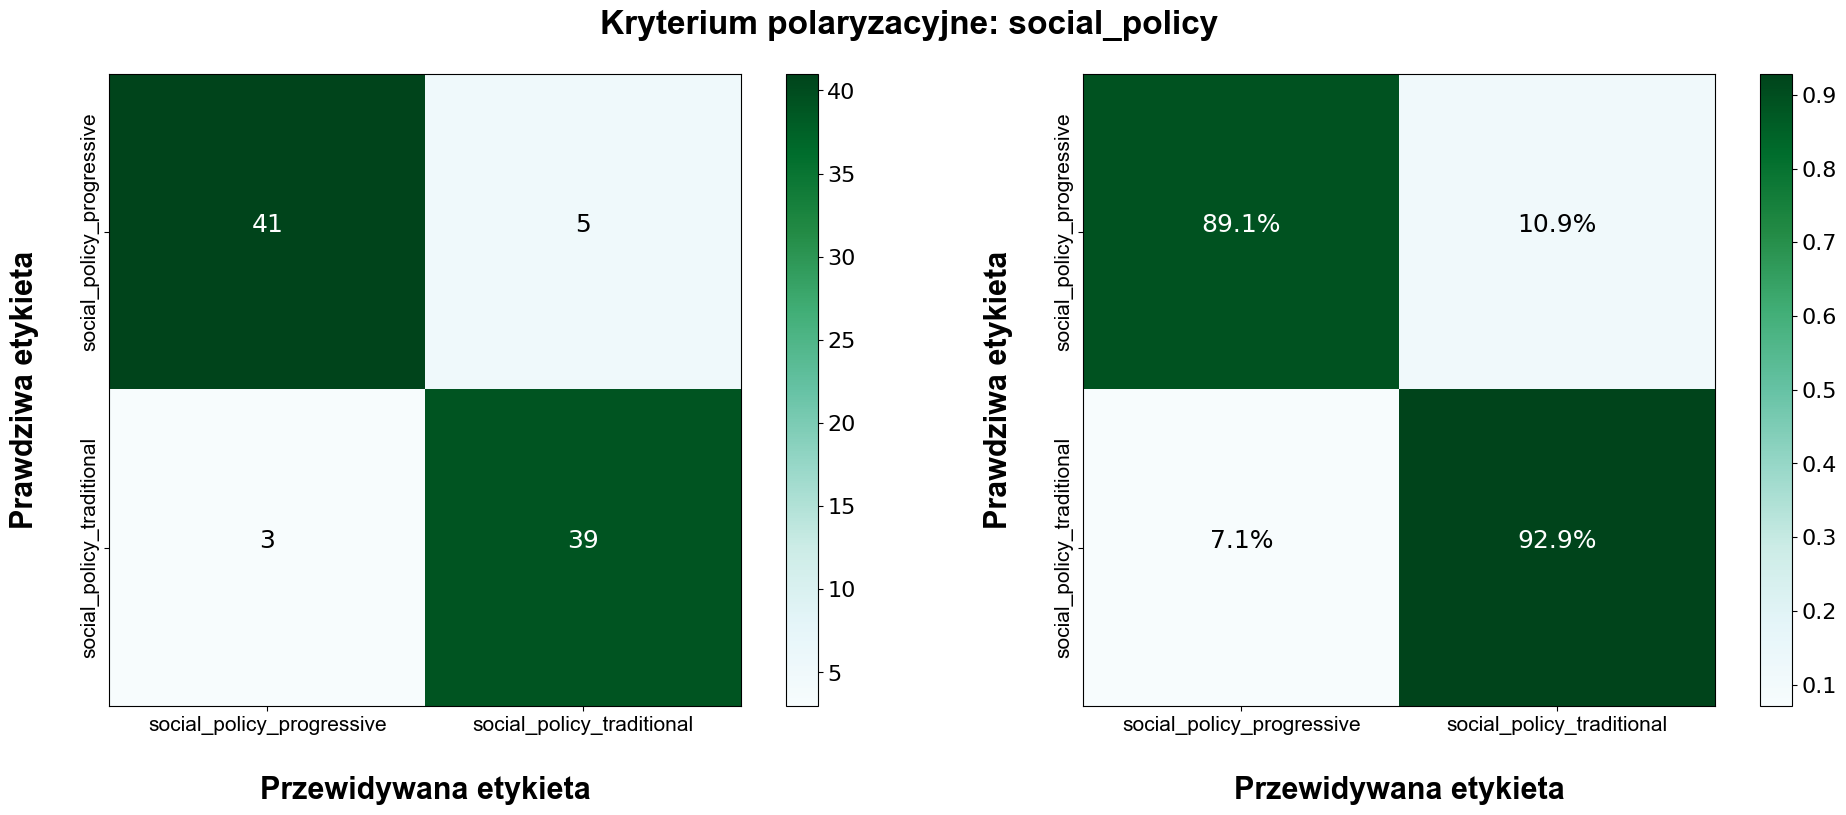


Metryki dla osi social_policy:
Liczba próbek: 88
Dokładność: 90.9%
Precyzja: 90.9%
Czułość: 91.0%
Wynik F1  90.9%


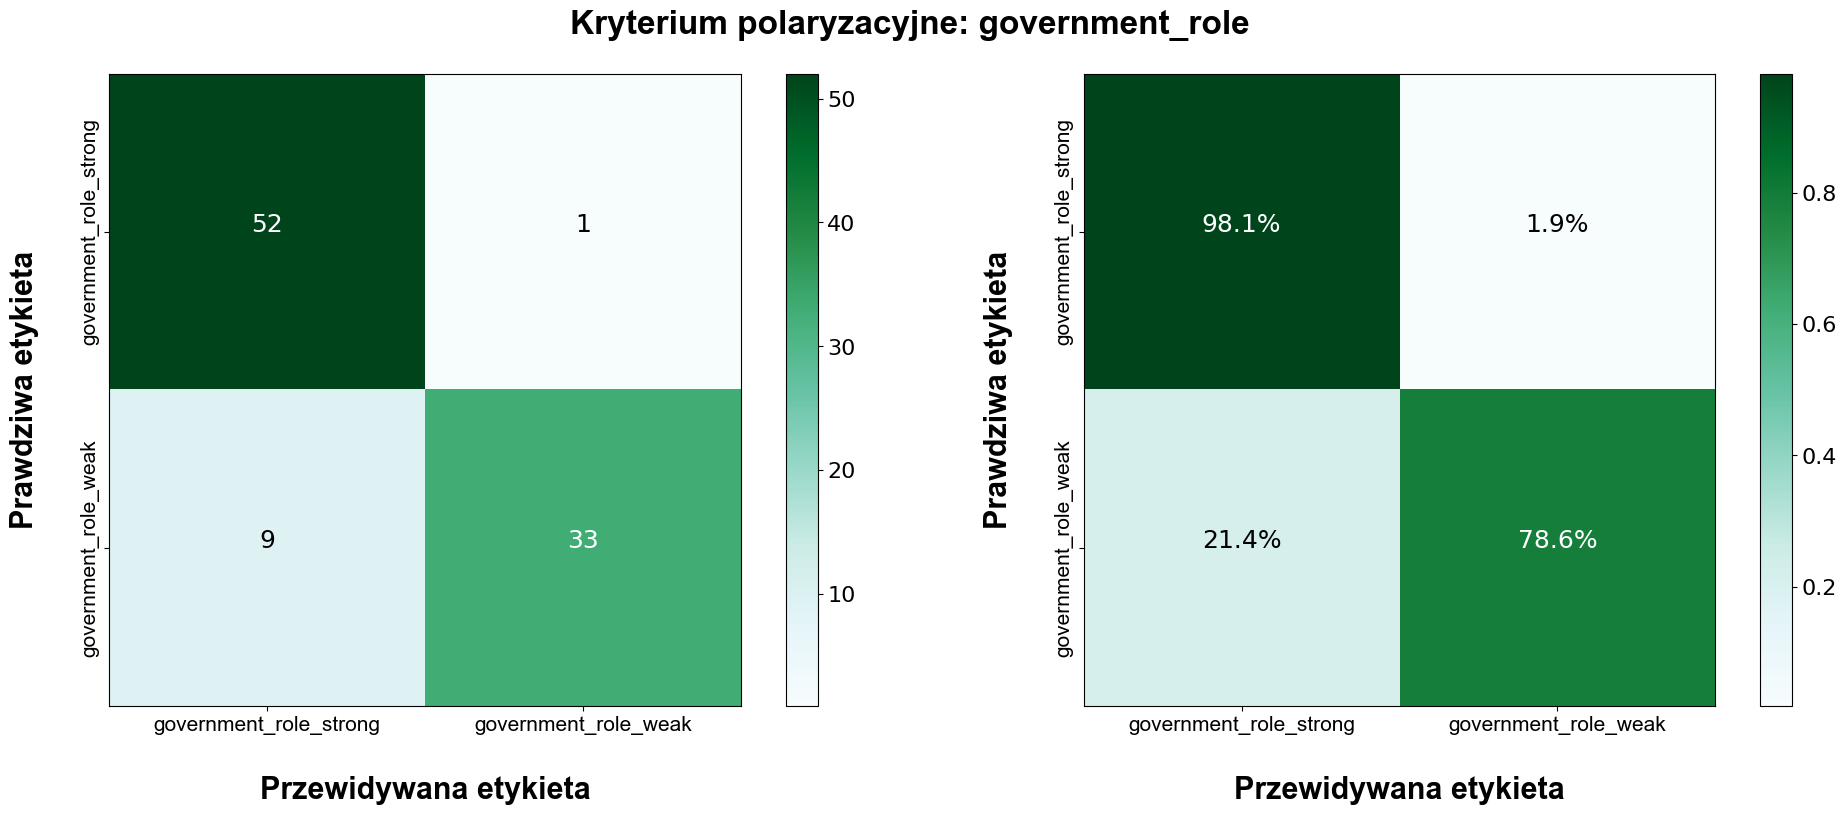


Metryki dla osi government_role:
Liczba próbek: 95
Dokładność: 89.5%
Precyzja: 91.2%
Czułość: 88.3%
Wynik F1  89.0%


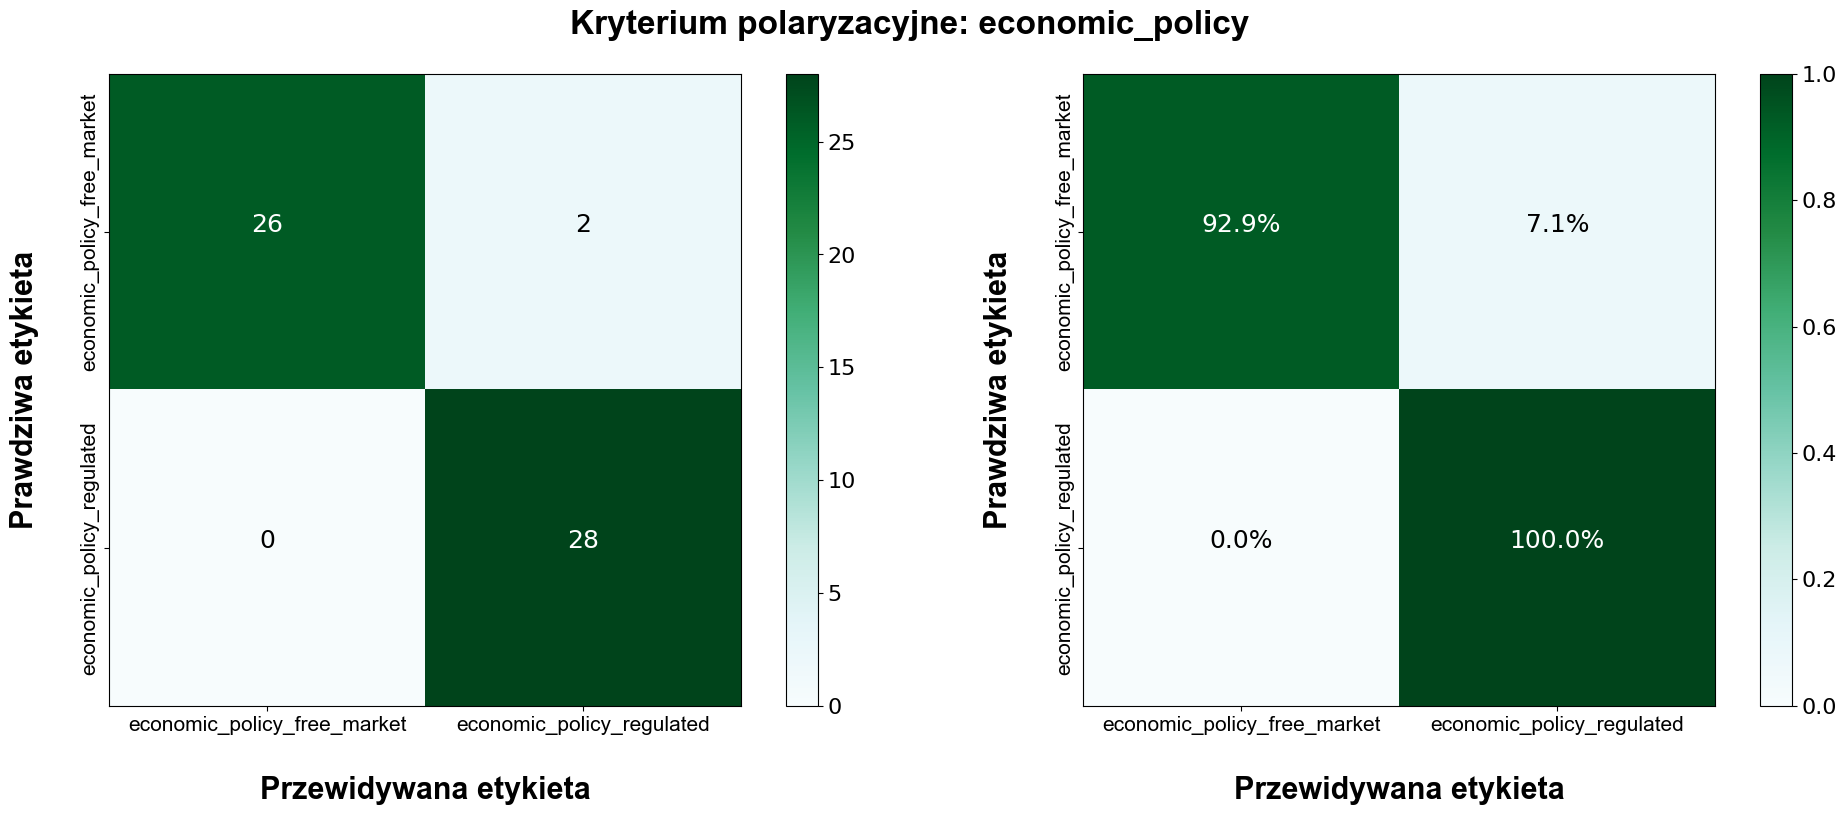


Metryki dla osi economic_policy:
Liczba próbek: 56
Dokładność: 96.4%
Precyzja: 96.7%
Czułość: 96.4%
Wynik F1  96.4%

=== ZBIORCZY RAPORT ===
Łączna liczba próbek: 239

Wyniki dla poszczególnych osi:

economic_policy:
  Liczba próbek: 56
  Poprawnych predykcji: 54
  Dokładność: 96.4% (54/56)

  Rozkład przewidywań:
    economic_policy_free_market: 26 (46.43%)
    economic_policy_regulated: 30 (53.57%)

  Rozkład rzeczywistych etykiet:
    economic_policy_free_market: 28 (50.00%)
    economic_policy_regulated: 28 (50.00%)

government_role:
  Liczba próbek: 95
  Poprawnych predykcji: 85
  Dokładność: 89.5% (85/95)

  Rozkład przewidywań:
    government_role_strong: 61 (64.21%)
    government_role_weak: 34 (35.79%)

  Rozkład rzeczywistych etykiet:
    government_role_strong: 53 (55.79%)
    government_role_weak: 42 (44.21%)

social_policy:
  Liczba próbek: 88
  Poprawnych predykcji: 80
  Dokładność: 90.9% (80/88)

  Rozkład przewidywań:
    social_policy_progressive: 44 (50.00%)
    soci

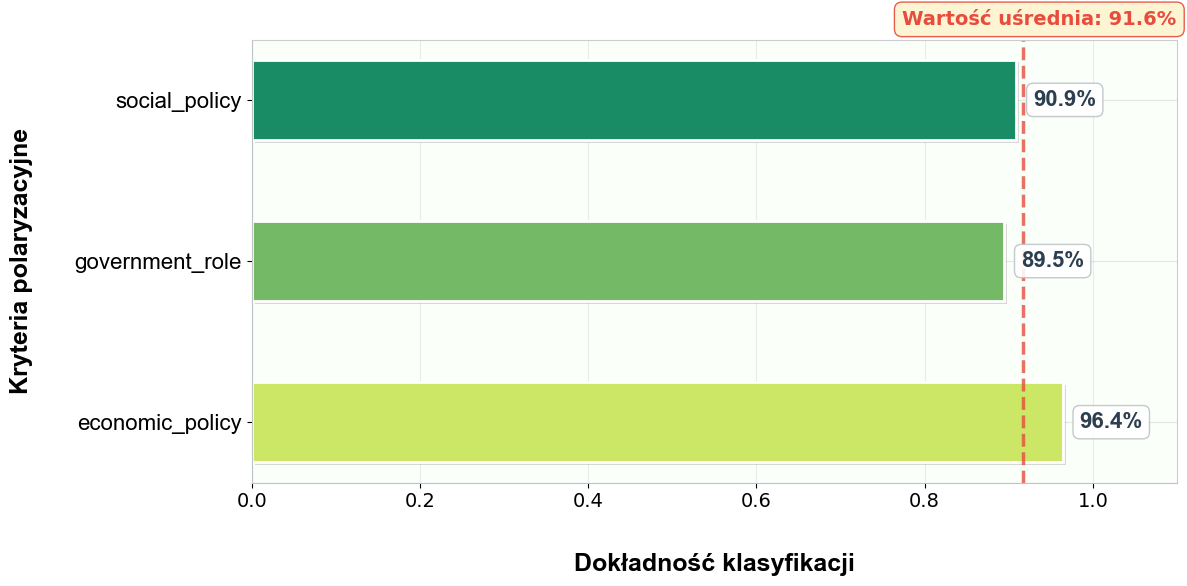

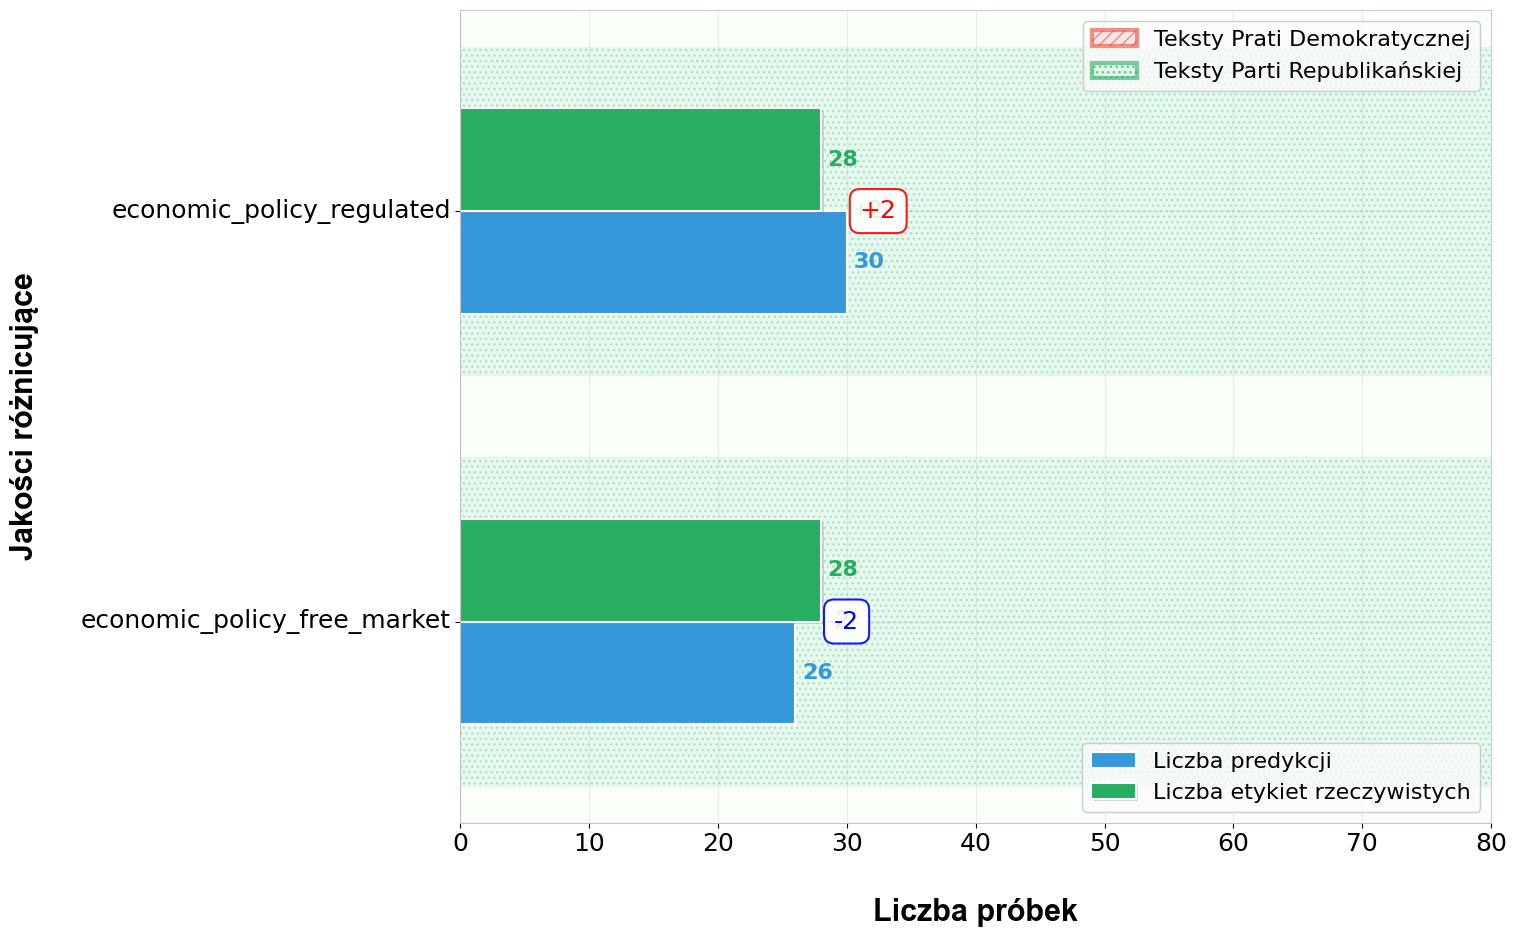

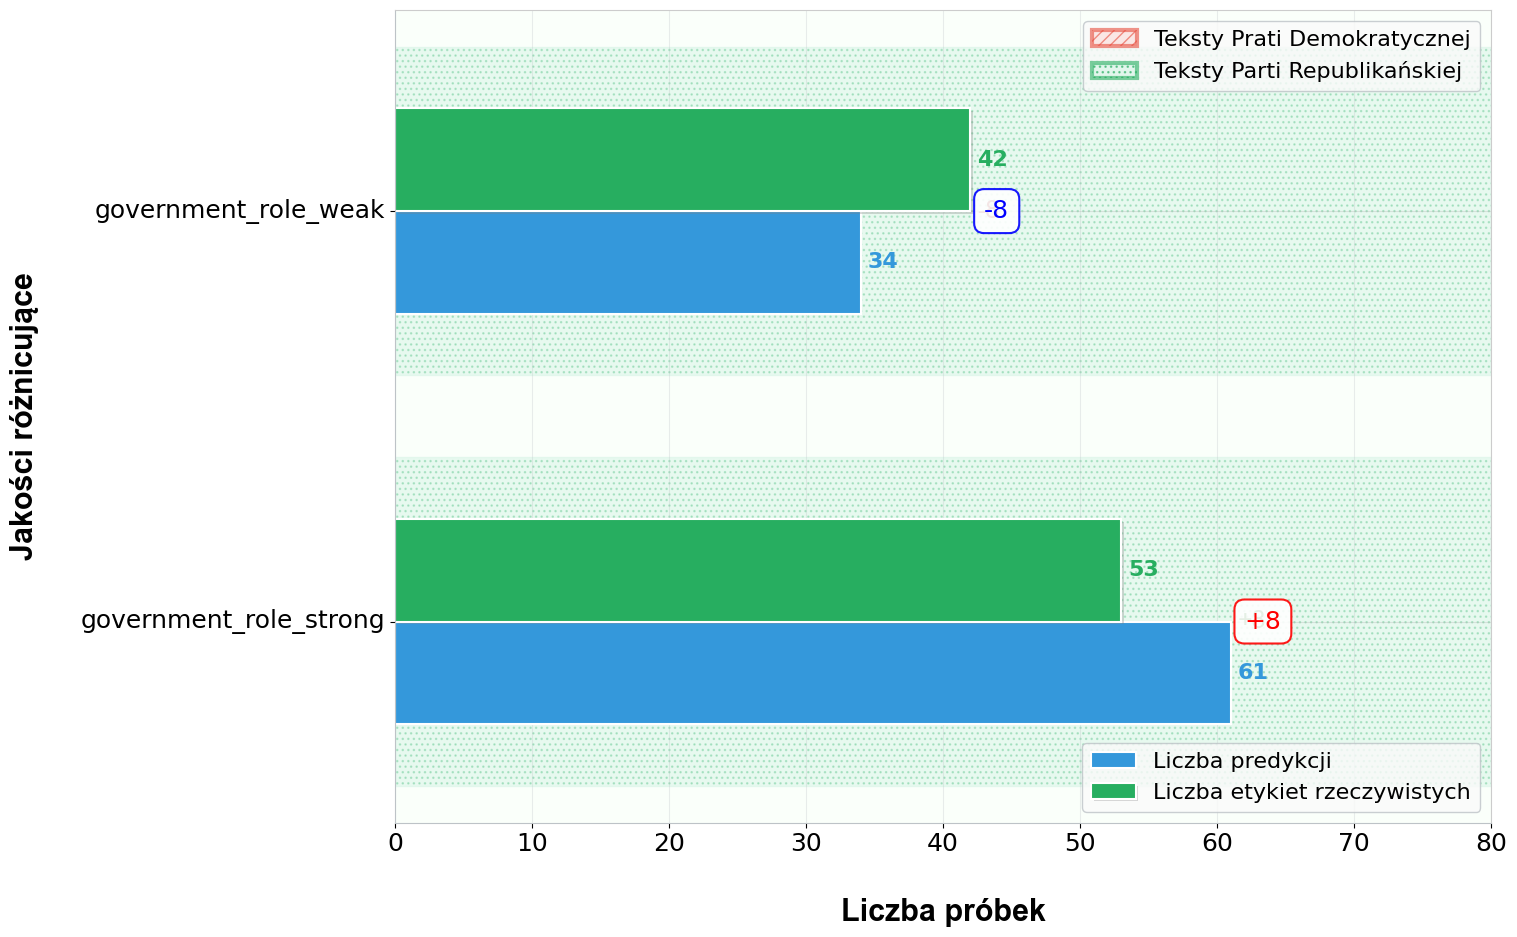

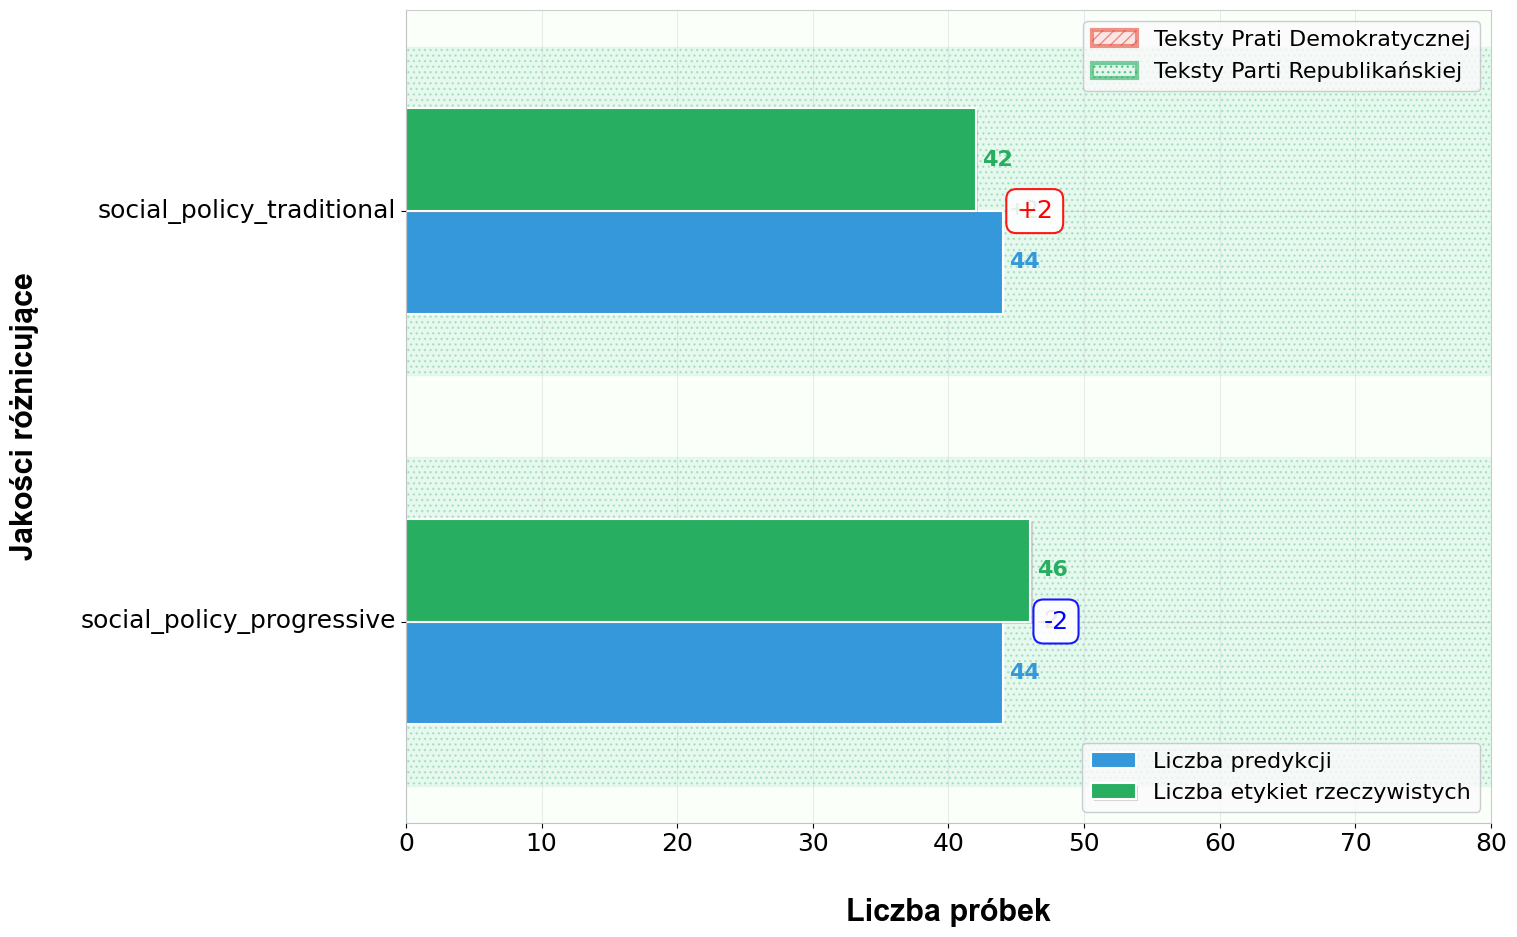

In [ ]:
from re import X
from huggingface_hub import Padding
from matplotlib.patches import Rectangle, Patch
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

def generate_summary_report(results_data):
    """
    Generuje zbiorczy raport z wynikami dla wszystkich osi,
    z ulepszoną wizualizacją i profesjonalnym wyglądem.
    
    :param results_data: Lista słowników z wynikami
    """
    from collections import Counter
    
    # Ustaw profesjonalny styl mtplotlib
    plt.rcParams.update({
        'font.size': 11,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 10,
        'figure.titlesize': 16,
        'axes.grid': True,
        'grid.alpha': 0.3,
        'axes.axisbelow': True,
        'axes.edgecolor': '#CCCCCC',
        'axes.linewidth': 0.8,
        'figure.facecolor': 'white',
        'axes.facecolor': '#fafffa'
    })
    
    # Znajdź wszystkie unikalne osie
    axes = sorted(list(set(item['axis_name'] for item in results_data)))
    
    # Przygotuj słownik do zbierania statystyk
    stats = {axis: {'correct': 0, 'total': 0, 'predictions': Counter(), 'true_labels': Counter()} for axis in axes}
    
    # Zlicz poprawne predykcje dla każdej osi
    for item in results_data:
        axis = item['axis_name']
        predicted = item['feature_name']
        
        if "balanced" in predicted:
            continue
            
        ground_truth = None
        true_label = None

        
        if 'government_role' in axis:
            ground_truth = item.get('ground_truth_government_role')
            if ground_truth is True:
                true_label = 'government_role_strong'
            elif ground_truth is False:
                true_label = 'government_role_weak'
            else:  # ground_truth is None
                continue  # Pomijamy przypadek balanced
        elif 'social_policy' in axis:
            ground_truth = item.get('ground_truth_social_policy')
            if ground_truth is True:
                true_label = 'social_policy_progressive'
            elif ground_truth is False:
                true_label = 'social_policy_traditional'
            else:  # ground_truth is None
                continue  # Pomijamy przypadek balanced
        elif 'economic_policy' in axis:
            ground_truth = item.get('ground_truth_economic_policy')
            if ground_truth is True:
                true_label = 'economic_policy_regulated'
            elif ground_truth is False:
                true_label = 'economic_policy_free_market'
            else:  # ground_truth is None
                continue  # Pomijamy przypadek balanced
        else:
            continue  # Nieobsługiwany typ osi
        
        stats[axis]['predictions'][predicted] += 1
        stats[axis]['true_labels'][true_label] += 1
        stats[axis]['total'] += 1
        if predicted == true_label:
            stats[axis]['correct'] += 1
    
    # Wyświetl zbiorczy raport
    print("\n=== ZBIORCZY RAPORT ===")
    print(f"Łączna liczba próbek: {sum(stats[axis]['total'] for axis in axes)}")
    print("\nWyniki dla poszczególnych osi:")
    
    # Przygotuj dane do wykresu
    axis_names = []
    accuracies = []
    
    for axis in axes:
        correct = stats[axis]['correct']
        total = stats[axis]['total']
        
        if total == 0:
            print(f"\n{axis}: Brak danych")
            continue
            
        accuracy = correct / total
        axis_names.append(axis)
        accuracies.append(accuracy)
        
        print(f"\n{axis}:")
        print(f"  Liczba próbek: {total}")
        print(f"  Poprawnych predykcji: {correct}")
        print(f"  Dokładność: {accuracy:.1%} ({correct}/{total})")
        
        print("\n  Rozkład przewidywań:")
        for label, count in sorted(stats[axis]['predictions'].items()):
            percentage = count / sum(stats[axis]['predictions'].values())
            print(f"    {label}: {count} ({percentage:.2%})")
        
        print("\n  Rozkład rzeczywistych etykiet:")
        for label, count in sorted(stats[axis]['true_labels'].items()):
            percentage = count / sum(stats[axis]['true_labels'].values())
            print(f"    {label}: {count} ({percentage:.2%})")
    
    if not axis_names:
        print("\nBrak danych dla wszystkich osi.")
        return
    
    # Łączna dokładność
    total_correct = sum(stats[axis]['correct'] for axis in axes)
    total_samples = sum(stats[axis]['total'] for axis in axes)
    total_accuracy = total_correct / total_samples if total_samples > 0 else 0
    
    # WYKRES 1: Poziomy wykres słupkowy dokładności
    fig_height = 6
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Utwórz gradient kolorów dla słupków
    colors = plt.cm.summer_r(np.linspace(0.2, 0.9, len(axis_names)))
    
    y_pos = np.arange(len(axis_names)*0.75)
    bar_height = 0.5
    bars = ax.barh(y_pos, accuracies, height=bar_height, 
                   color=colors, edgecolor='white', linewidth=1.5)
    

    
    # Dodaj gradient/cienie do słupków
    for i, (bar, accuracy) in enumerate(zip(bars, accuracies)):
        # Dodaj subtelny gradient
        bar.set_facecolor(colors[i])
        
        # Dodaj ramkę z zaokrąglonymi rogami (symulacja)
        bar.set_edgecolor('white')
        bar.set_linewidth(2)

    
    from matplotlib.patheffects import withSimplePatchShadow
    for bar in bars:
        bar.set_path_effects([withSimplePatchShadow(offset=(2, -2), 
                                                shadow_rgbFace='grey', 
                                                alpha=0.3)])


    # Profesjonalne etykiety
    ax.set_xlabel('Dokładność klasyfikacji', fontsize=18, fontweight='bold', labelpad=30,fontname='Arial')
    ax.set_ylabel('Kryteria polaryzacyjne', fontsize=18 ,fontweight='bold', labelpad=30, fontname='Arial')
    #ax.set_title('Analiza dokładności klasyfikacji\ndla przyjętych kryteriów polaryzacyjnych', 
     #           fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
    
    # Ustaw zakresy
    ax.set_xlim(0, 1.1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(axis_names, fontsize=16,fontname='Arial')

    
    # Dodaj eleganckie wartości obok słupków
    for i, (bar, accuracy) in enumerate(zip(bars, accuracies)):
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2.,
                f'{accuracy:.1%}', 
                ha='left', va='center', fontsize=16,fontname='Arial', fontweight='bold',
                color='#2C3E50',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                         edgecolor='#BDC3C7', alpha=0.9))
    
    # Dodaj elegancką linię średniej
    ax.axvline(x=total_accuracy, color='#E74C3C', linestyle='--', linewidth=2.5, alpha=0.8)
    ax.text(total_accuracy + 0.02, len(axis_names) - 0.5, 
            f'Wartość uśrednia: {total_accuracy:.1%}',
            ha='center', va='center', fontsize=14, fontweight='bold',
            color='#E74C3C',
            bbox=dict(boxstyle="round,pad=0.4", facecolor='#FCF3CF', 
                     edgecolor='#E74C3C', alpha=0.9))
    
    # Ulepszona siatka
    ax.grid(axis='x', linestyle='-', alpha=0.3, color='#BDC3C7')
    ax.set_axisbelow(True)
    
    # Usuń niepotrzebne ramki
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    
    plt.tight_layout()
    plt.savefig(f'{NAME_OF_SIMULATION}_accurency.png', dpi=400, bbox_inches='tight')

    plt.show()
    
    # WYKRES 2: Ulepszone wykresy porównawcze dla każdej osi
    for axis_idx, axis in enumerate(axes):
        if stats[axis]['total'] == 0:
            continue
        
        all_labels = set()
        all_labels.update(stats[axis]['predictions'].keys())
        all_labels.update(stats[axis]['true_labels'].keys())
        sorted_labels = sorted(list(all_labels))
        
        pred_counts = [stats[axis]['predictions'].get(label, 0) for label in sorted_labels]
        true_counts = [stats[axis]['true_labels'].get(label, 0) for label in sorted_labels]
        
        # Dynamiczny rozmiar figury
        fig_height = 10
        fig, ax = plt.subplots(figsize=(18, fig_height))
        
        y = np.arange(len(sorted_labels))
        height = 0.25
        
        # Eleganckie kolory
        pred_color = '#3498DB'  # Niebieski
        true_color = '#27AE60'  # Zielony
        


        # Utwórz słupki
        bars1 = ax.barh(y - height/2, pred_counts, height, label='Liczba predykcji', 
                        color=pred_color, edgecolor='white', linewidth=1.5)

        bars2 = ax.barh(y + height/2, true_counts, height, label='Liczba etykiet rzeczywistych', 
                        color=true_color, edgecolor='white', linewidth=1.5)


        for pred, true, pos in zip(pred_counts, true_counts, y):
            diff = pred - true
            ax.text(max(pred, true) + 0.5, pos, f'{diff:+.0f}', va='center', fontsize=18,
                    color='darkred' if diff < 0 else 'darkgreen',fontname='Arial')


        # Dodaj eleganckie różnice
        for i in range(len(sorted_labels)):
            diff = pred_counts[i] - true_counts[i]
            if diff != 0:
                max_width = max(pred_counts[i], true_counts[i])
                
                # Kolor różnicy na podstawie wielkości
                if diff > 0:
                    diff_color = 'red'  # Czerwony dla nadmiaru
                else:
                    diff_color = 'blue'  # niebieski dla niedoboru
                
                ax.annotate(
                    f"{'+' if diff > 0 else ''}{diff}",
                    xy=(max_width + 1, y[i]),
                    ha='left', va='center',
                    fontsize=18, color=diff_color,
                    bbox=dict(boxstyle="round,pad=0.4", 
                             facecolor='white', edgecolor=diff_color, 
                             alpha=0.9, linewidth=1.5)
                )
        ax.tick_params(axis='both', labelsize=18)

        # Profesjonalne etykiety
        ax.set_ylabel('Jakości różnicujące', fontsize=22, labelpad=30, fontweight='bold', fontname='Arial')
        ax.set_xlabel('Liczba próbek', fontsize=22, labelpad=30, fontweight='bold', fontname='Arial')
       # ax.set_title(f'Analiza porównawcza przewidywań do rzeczywistych etykiet,\n kryterium polaryzacyjne: {axis}', 
        #            fontsize=15,  fontweight='bold', pad=25)
        X_AXES_LIM= 80
        ax.set_xlim(0, X_AXES_LIM)

        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        
        for bars, color in [(bars1, pred_color), (bars2, true_color)]:
            for bar in bars:
                width = bar.get_width()
                if width > 0:
                    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
                           f'{int(width)}', ha='left', va='center',
                           fontsize=16, fontweight='bold', color=color)
                    

        from matplotlib.patheffects import withSimplePatchShadow
        for bar in bars:
            bar.set_path_effects([withSimplePatchShadow(offset=(2, -2), 
                                                    shadow_rgbFace='grey', 
                                                    alpha=0.3)])
        
        # Ustaw etykiety osi Y
        ax.set_yticks(y)
        
        # Skróć długie nazwy etykiet dla lepszej czytelności
        short_labels = []
        for label in sorted_labels:
            if len(label) > 25:
                # Inteligentne skracanie przy zachowaniu kluczowych słów
                parts = label.split('_')
                if len(parts) >= 2:
                    short_label = label
                else:
                    short_label = label
            else:
                short_label = label
            short_labels.append(short_label)
        
        ax.set_yticklabels(short_labels, fontsize=18, rotation= 0,va='center')
        
        # Dodaj kolorowe tło dla kategorii
        for i, label in enumerate(sorted_labels):
            is_anti = any(term in label.lower() for term in ['harmful', 'ineffective'])
            
            if is_anti:
                bg_color = '#FADBD8'  # Jasny czerwony
                pattern_color = '#E74C3C'
                hatch_pattern = '///'
            else:
                bg_color = '#D5F4E6'  # Jasny zielony
                pattern_color = '#27AE60'
                hatch_pattern = '...'
            
            # Subtelne tło
            ax.axhspan(i - 0.4, i + 0.4, alpha=0.5, color=bg_color, zorder=0)
            
            # Subtelny wzór
            rect = Rectangle((0, i - 0.4), ax.get_xlim()[1] if ax.get_xlim()[1] > 0 else 50, 0.8,
                           fill=False, hatch=hatch_pattern, alpha=0.5,
                           edgecolor=pattern_color, linewidth=0, zorder=-1)
            ax.add_patch(rect)
        
        # Elegancka legenda
        legend1 = ax.legend(loc='lower right', frameon=True, fancybox=True, 
                           shadow=False, edgecolor='#BDC3C7',  fontsize=16)
        legend1.get_frame().set_facecolor('#FAFAFA')
        
        # Dodaj drugą legendę dla kategorii
        antivax_patch = Patch(facecolor='#FADBD8', alpha=0.6, edgecolor='#E74C3C',
                             hatch='///', linewidth=3, label='Teksty Prati Demokratycznej')
        provax_patch = Patch(facecolor='#D5F4E6', alpha=0.6, edgecolor='#27AE60',
                            hatch='...', linewidth=3, label='Teksty Parti Republikańskiej')
        
        legend2 = ax.legend(handles=[antivax_patch, provax_patch], 
                           loc='upper right', frameon=True, fancybox=True, fontsize=16,
                           shadow=False, edgecolor='#BDC3C7')
        legend2.get_frame().set_facecolor('#FAFAFA')
        ax.add_artist(legend1)
        
        # Profesjonalna siatka
        ax.grid(axis='x', linestyle='-', alpha=0.3, color='#BDC3C7')
        ax.set_axisbelow(True)
        

        
        # Usuń niepotrzebne ramki
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(True)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#BDC3C7')
            ax.spines[spine].set_linewidth(0.8)
        
        # Dodaj statystyki w eleganckim oknie
        total_pred = sum(pred_counts)
        total_true = sum(true_counts)
        accuracy = sum(min(p, t) for p, t in zip(pred_counts, true_counts)) / total_true if total_true > 0 else 0
        
        # stats_text = f"Dokładność: {accuracy:.1%}\nPróbek: {total_true}\nPoprawnych: {sum(min(p, t) for p, t in zip(pred_counts, true_counts))}"
        
        # ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=11,
        #        verticalalignment='top', fontweight='bold', color='#2C3E50',
        #        bbox=dict(boxstyle="round,pad=0.6", facecolor='#EBF5FB', 
        #                 edgecolor='#3498DB', alpha=0.9, linewidth=1.5))
        
        plt.tight_layout(rect=[0, 0, 0.85, 0.95])

        plt.savefig(f'{NAME_OF_SIMULATION}_com_{axis}.png', dpi=400, bbox_inches='tight')

        plt.show()
    
    # Resetuj styl matplotlib na koniec
    plt.rcdefaults()


def generate_confusion_matrix(results_data, axis_name=None):
    """
    Generuje macierz pomyłek dla określonej osi lub wszystkich osi,
    dynamicznie wykrywając dostępne kategorie.
    
    :param results_data: Lista słowników z wynikami (zgodnie z podaną strukturą)
    :param axis_name: Nazwa osi, dla której chcemy wygenerować macierz pomyłek (lub None dla wszystkich osi)
    :return: Słownik z danymi do macierzy pomyłek
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    from collections import Counter
    
    # Jeśli podano konkretną oś, filtrujemy wyniki tylko dla tej osi
    if axis_name:
        filtered_results = [item for item in results_data if item['axis_name'] == axis_name]

        axes_to_analyze = [axis_name]
    else:
        filtered_results = results_data
        # Znajdź wszystkie unikalne osie
        axes_to_analyze = list(set(item['axis_name'] for item in results_data))
    
    # Przygotuj słownik do przechowywania wyników dla każdej osi
    results = {}
    
    for current_axis in axes_to_analyze:
        # Filtruj wyniki dla bieżącej osi
        axis_results = [item for item in filtered_results if item['axis_name'] == current_axis]
        
        if not axis_results:
            print(f"Brak danych dla osi {current_axis}")
            continue
        
        # Określ typ osi na podstawie jej nazwy
        axis_type = None
        if 'government_role' in current_axis:
            axis_type = 'government_role'
        elif 'social_policy' in current_axis:
            axis_type = 'social_policy'
        elif 'economic_policy' in current_axis:
            axis_type = 'economic_policy'


        if not axis_type:
            print(f"Nieobsługiwany typ osi: {current_axis}")
            continue
        
        # Przygotuj listy predykcji i rzeczywistych etykiet
        predictions = []
        true_labels = []
        
        for item in axis_results:
            # Dodaj predykcję - nazwa cechy w obecnym formacie
            predicted_label = item['feature_name']
            
            # Jeśli predicted zawiera "balanced", pomijamy ten przypadek
            if "balanced" in predicted_label:
                continue
                
            # Określ wartość rzeczywistą (ground_truth) na podstawie typu osi
            ground_truth_value = None
            if axis_type == 'government_role':
                ground_truth_value = item.get('ground_truth_government_role')
            elif axis_type == 'social_policy':
                ground_truth_value = item.get('ground_truth_social_policy')
            elif axis_type == 'economic_policy':
                ground_truth_value = item.get('ground_truth_economic_policy')
                
            # Jeśli ground_truth_value jest None (balanced), pomijamy ten przypadek
            if ground_truth_value is None:
                continue


# if 'government_role' in axis:
#             ground_truth = item.get('ground_truth_government_role')
#             if ground_truth is True:
#                 true_label = 'government_role_strong'
#             elif ground_truth is False:
#                 true_label = 'government_role_weak'
#             else:  # ground_truth is None
#                 continue  # Pomijamy przypadek balanced
#         elif 'social_policy' in axis:
#             ground_truth = item.get('ground_truth_social_policy')
#             if ground_truth is True:
#                 true_label = 'social_policy_progressive'
#             elif ground_truth is False:
#                 true_label = 'social_policy_traditional'
#             else:  # ground_truth is None
#                 continue  # Pomijamy przypadek balanced
#         elif 'economic_policy' in axis:
#             ground_truth = item.get('ground_truth_economic_policy')
#             if ground_truth is True:
#                 true_label = 'economic_policy_regulated'
#             elif ground_truth is False:
#                 true_label = 'economic_policy_free_market'







                
            # Dodaj rzeczywistą etykietę zgodnie z nowym formatem
            # True odpowiada etykiecie _strong, _progressive lub _regulated
            # False odpowiada etykiecie _weak, _traditional lub _free_market
            if ground_truth_value is True:
                if axis_type == 'government_role':
                    true_label = f'{axis_type}_strong'
                elif axis_type == 'social_policy':
                    true_label = f'{axis_type}_progressive'
                elif axis_type == 'economic_policy':
                    true_label = f'{axis_type}_regulated'
            elif ground_truth_value is False:
                if axis_type == 'government_role':
                    true_label = f'{axis_type}_weak'
                elif axis_type == 'social_policy':
                    true_label = f'{axis_type}_traditional'
                elif axis_type == 'economic_policy':
                    true_label = f'{axis_type}_free_market'
            else:
                continue  # Ten przypadek nie powinien wystąpić po powyższym sprawdzeniu
            
            
            # Dodaj do list
            predictions.append(predicted_label)
            true_labels.append(true_label)
        
        if not predictions or not true_labels:
            print(f"Brak wystarczających danych do utworzenia macierzy pomyłek dla osi {current_axis}")
            continue
        
        # Dynamicznie wykryj wszystkie unikalne klasy (etykiety)
        unique_predictions = set(predictions)
        unique_true_labels = set(true_labels)
        classes = sorted(list(unique_predictions.union(unique_true_labels)))
        
        # Oblicz macierz pomyłek
        cm = confusion_matrix(true_labels, predictions, labels=classes)
        
        # Oblicz znormalizowaną macierz pomyłek
        row_sums = cm.sum(axis=1)
        cm_normalized = np.zeros_like(cm, dtype=float)
        
        for i in range(len(row_sums)):
            if row_sums[i] > 0:
                cm_normalized[i] = cm[i] / row_sums[i]
        
        # Oblicz metryki
        accuracy = accuracy_score(true_labels, predictions)
        
        try:
            precision = precision_score(true_labels, predictions, average='macro', labels=classes, zero_division=0)
            recall = recall_score(true_labels, predictions, average='macro', labels=classes, zero_division=0)
            f1 = f1_score(true_labels, predictions, average='macro', labels=classes, zero_division=0)
        except Exception as e:
            print(f"Błąd podczas obliczania metryk dla osi {current_axis}: {e}")
            precision = recall = f1 = 0
        
        # Zapisz wyniki
        results[current_axis] = {
            'confusion_matrix': cm,
            'normalized_confusion_matrix': cm_normalized,
            'classes': classes,
            'predictions': predictions,
            'true_labels': true_labels,
            'metrics': {
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1
            }
        }
        
        # Wizualizacja
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
 
        # Macierz bez normalizacji
        im1 = ax1.imshow(cm, interpolation='nearest', cmap=plt.cm.BuGn)
        fig.suptitle(f'Kryterium polaryzacyjne: {current_axis}', fontsize=24, fontweight='bold', fontname='Arial')
       # Colorbar i ustawienie jego czcionki
        cbar1 = plt.colorbar(im1, ax=ax1)  # <== tu przypisujemy cbar
        cbar1.ax.tick_params(labelsize=16)  # zmiana rozmiaru ticków

     
        
        # Etykiety
        tick_marks = np.arange(len(classes))
        ax1.set_xticks(tick_marks)
  
        # def change_spaces(list_of_words):
        #     changed_list = []
        #     changed_word= ''
        #     for word in list_of_words:
        #         new_word = word.replace("_", " ")
        #         changed_list.append(new_word)
        #     return changed_list
        
        # new_classes = change_spaces(classes)
        ax1.set_xticklabels(classes, rotation=0, ha='center',  fontsize=15,fontname='Arial')
        ax1.set_yticks(tick_marks)
        ax1.set_yticklabels(classes, rotation=90,  va='center',  fontsize=15, fontname='Arial')
        
        # Wartości 
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax1.text(j, i, format(cm[i, j], 'd'),
                        horizontalalignment="center", fontsize=18,
                        color="white" if cm[i, j] > thresh else "black")
        
        ax1.set_ylabel('Prawdziwa etykieta', labelpad=30,  fontsize=22, fontweight='bold',fontname='Arial')
        ax1.set_xlabel('Przewidywana etykieta', labelpad=30,  fontsize=22, fontweight='bold',fontname='Arial')
        
        # Macierz znormalizowana
        im2 = ax2.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.BuGn)
        # ax2.set_title(f'Kryterium polaryzacyjne: {current_axis}',  fontsize=18)
        cbar2 = plt.colorbar(im2, ax=ax2)
        cbar2.ax.tick_params(labelsize=16)  # zmiana rozmiaru ticków

        # Etykiety
        ax2.set_xticks(tick_marks)
        ax2.set_xticklabels(classes, rotation=0, ha='center',  fontsize=15, fontname='Arial')
        ax2.set_yticks(tick_marks)
        ax2.set_yticklabels(classes, rotation=90, va='center',  fontsize=15, fontname='Arial')
        
        # Wartości
        thresh = 0.5
        for i in range(cm_normalized.shape[0]):
            for j in range(cm_normalized.shape[1]):
                ax2.text(j, i, f"{cm_normalized[i, j]:.1%}",  # Format procentowy z jednym miejscem po przecinku
                horizontalalignment="center", fontsize=18,
                color="white" if cm_normalized[i, j] > thresh else "black")
        
        ax2.set_ylabel('Prawdziwa etykieta', labelpad=30 , fontsize=22, fontweight='bold', fontname='Arial' )
        ax2.set_xlabel('Przewidywana etykieta', labelpad=30 ,  fontsize=22, fontweight='bold', fontname='Arial')
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.savefig(f'{NAME_OF_SIMULATION}_cf_mx_{current_axis}.png', dpi=400, bbox_inches='tight')

        plt.show()
        
        # Wyświetl metryki
        print(f"\nMetryki dla osi {current_axis}:")
        print(f"Liczba próbek: {len(true_labels)}")
        print(f"Dokładność: {accuracy:.1%}")
        print(f"Precyzja: {precision:.1%}")
        print(f"Czułość: {recall:.1%}")
        print(f"Wynik F1  {f1:.1%}")


        # Wczytaj dane z pliku lub użyj bezpośrednio podanej listy
import ast


# import json

# with open(RESULTS_PATH_NAME, "r", encoding="utf-8") as plik:
#     results_metrics = json.load(plik)

# Generuj macierze pomyłek dla wszystkich osi
results = generate_confusion_matrix(results_metrics)

# Generuj zbiorczy raport
generate_summary_report(results_metrics)
        


PODSUMOWANIE METRYK KLASYFIKACJI
  Dokładność: 0.9643
  Precyzja:   0.9667
  Czułość:    0.9643
  Wynik F1:   0.9642
  Dokładność: 0.8947
  Precyzja:   0.9115
  Czułość:    0.8834
  Wynik F1:   0.8904
  Dokładność: 0.9091
  Precyzja:   0.9091
  Czułość:    0.9099
  Wynik F1:   0.9090


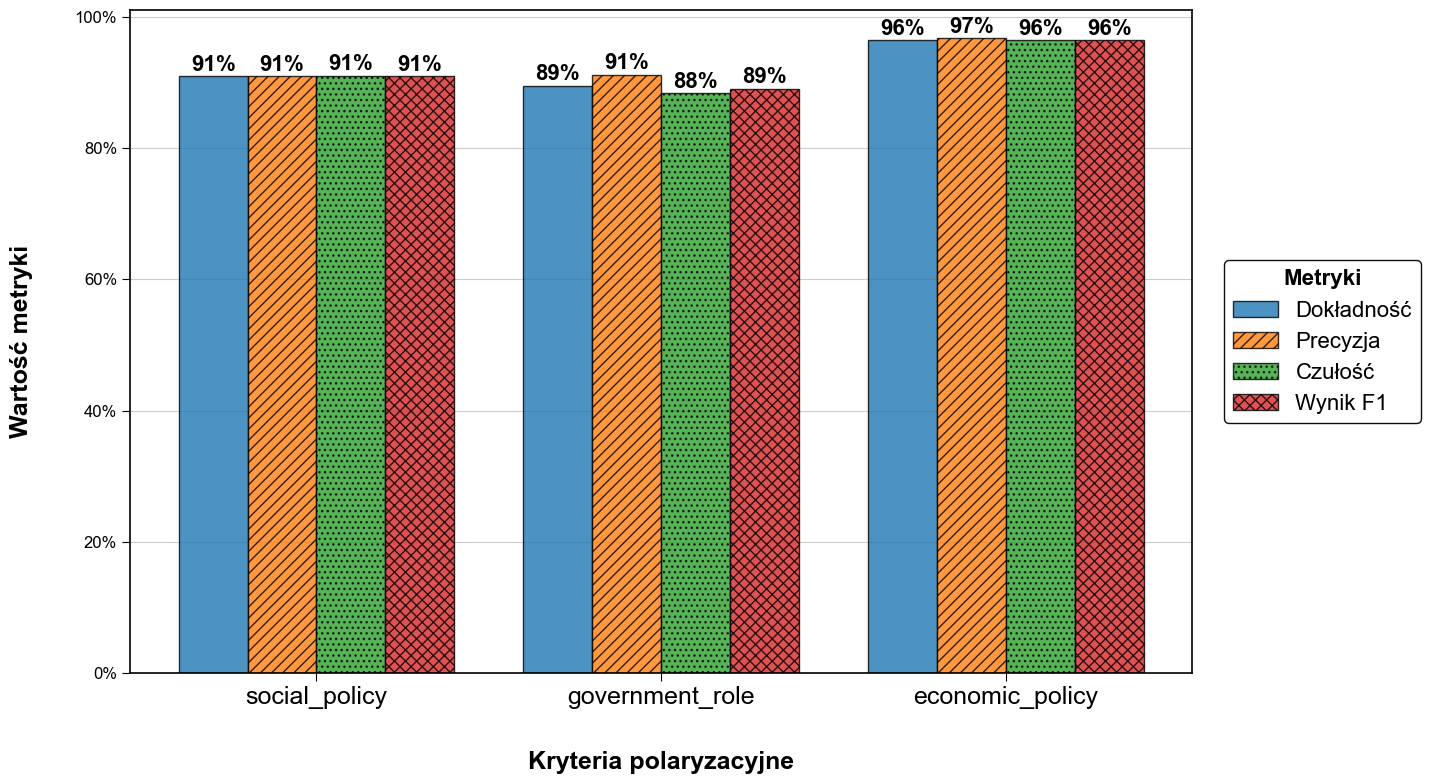

In [ ]:
def generate_comprehensive_report(results_data, NAME_OF_SIMULATION="simulation"):
    """
    Generuje zbiorczy raport z wynikami dla wszystkich osi,
    pokazujący dokładność, F1, precyzję i czułość na pionowym wykresie.
    Styl dostosowany do publikacji naukowych z polskimi nazwami.
    
    :param results_data: Lista słowników z wynikami
    :param NAME_OF_SIMULATION: Nazwa symulacji do użycia w nazwie pliku
    """
    from collections import Counter
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    # Ustaw styl akademicki matplotlib z polskim wsparciem
    plt.style.use('default')
    plt.rcParams.update({
        'font.family': 'Arial',      # DejaVu Sans lepiej wspiera polskie znaki
        'font.size': 12,                  # Większa czcionka dla wyrazistości
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 11,
        'figure.titlesize': 18,
        'axes.linewidth': 1.2,            # Grubsze linie dla wyrazistości
        'axes.edgecolor': 'black',
        'axes.facecolor': 'white',
        'figure.facecolor': 'white',
        'axes.grid': False,
        'axes.axisbelow': True,
        'xtick.direction': 'out',         # Znaczniki na zewnątrz dla lepszej widoczności
        'ytick.direction': 'out',
        'xtick.major.size': 6,            # Większe znaczniki
        'ytick.major.size': 6,
        'xtick.minor.size': 3,
        'ytick.minor.size': 3,
        'axes.spines.top': True,
        'axes.spines.right': True,
        'axes.spines.left': True,
        'axes.spines.bottom': True
    })
    
    # Znajdź wszystkie unikalne osie
    axes = sorted(list(set(item['axis_name'] for item in results_data)))
    
    # Przygotuj słownik do zbierania statystyk i metryk
    stats = {axis: {
        'correct': 0, 
        'total': 0, 
        'predictions': Counter(), 
        'true_labels': Counter(),
        'y_true': [],
        'y_pred': []
    } for axis in axes}
    
    # Zlicz poprawne predykcje i przygotuj dane do metryk dla każdej osi
    for item in results_data:
        axis = item['axis_name']
        predicted = item['feature_name']
        
        # WAŻNE: Używamy tego samego filtra co w macierzy pomyłek
        if "balanced" in predicted:
            continue
            
        # Określ typ osi (zgodnie z kodem macierzy)
        axis_type = None
        if 'government_role' in axis:
            axis_type = 'government_role'
        elif 'social_policy' in axis:
            axis_type = 'social_policy'
        elif 'economic_policy' in axis:
            axis_type = 'economic_policy'
        
        if not axis_type:
            continue
    




        # Pobierz ground truth zgodnie z typem osi (jak w macierzy)
        # Określ wartość rzeczywistą (ground_truth) na podstawie typu osi
        ground_truth_value = None
        if axis_type == 'government_role':
            ground_truth_value = item.get('ground_truth_government_role')
        elif axis_type == 'social_policy':
            ground_truth_value = item.get('ground_truth_social_policy')
        elif axis_type == 'economic_policy':
            ground_truth_value = item.get('ground_truth_economic_policy')
    
        # Pomiń przypadki z None (jak w macierzy)
        if ground_truth_value is None:
            continue
            
        # Mapowanie zgodne z kodem macierzy pomyłek
        if ground_truth_value is True:
            if axis_type == 'government_role':
                true_label = f'{axis_type}_strong'
                binary_true = 1
            elif axis_type == 'social_policy':
                true_label = f'{axis_type}_progressive'
                binary_true = 1
            elif axis_type == 'economic_policy':
                true_label = f'{axis_type}_regulated'
                binary_true = 1
        elif ground_truth_value is False:
            if axis_type == 'government_role':
                true_label = f'{axis_type}_weak'
                binary_true = 0
            elif axis_type == 'social_policy':
                true_label = f'{axis_type}_traditional'
                binary_true = 0
            elif axis_type == 'economic_policy':
                true_label = f'{axis_type}_free_market'
                binary_true = 0
        else:
            continue
        
        # Konwertuj przewidywanie na wartość binarną - POPRAWIONE MAPOWANIE
        # Sprawdź czy przewidywanie pasuje do prawdziwej etykiety
        if predicted == true_label:
            binary_pred = binary_true  # Poprawna predykcja
        else:
            binary_pred = 1 - binary_true  # Niepoprawna predykcja
            
        # Zapisz wartości binarne
        stats[axis]['y_true'].append(binary_true)
        stats[axis]['y_pred'].append(binary_pred)
        
        stats[axis]['predictions'][predicted] += 1
        stats[axis]['true_labels'][true_label] += 1
        stats[axis]['total'] += 1
        if predicted == true_label:
            stats[axis]['correct'] += 1
    
    # Oblicz metryki dla każdej osi - ZGODNIE Z KODEM MACIERZY
    metrics = {}
    for axis in axes:
        if stats[axis]['total'] == 0:
            continue
        




        # Przygotuj listy dla sklearn (jak w macierzy pomyłek)
        predictions_list = []
        true_labels_list = []
        


    
        # Zbierz wszystkie predykcje i prawdziwe etykiety
        for i in range(len(stats[axis]['y_true'])):
            # Mapowanie z powrotem na nazwy etykiet
            true_binary = stats[axis]['y_true'][i]
            pred_binary = stats[axis]['y_pred'][i]
            
            # Określ typ osi
            axis_type = None
            if 'government_role' in axis:
                axis_type = 'government_role'
            elif 'social_policy' in axis:
                axis_type = 'social_policy'
            elif 'economic_policy' in axis:
                axis_type = 'economic_policy'
            
            if not axis_type:
                continue



                
            # Mapowanie binary -> etykiety (zgodne z macierzą)
            if true_binary == 1:
                if axis_type == 'government_role':
                    true_label = f'{axis_type}_strong'
                elif axis_type == 'social_policy':
                    true_label = f'{axis_type}_progressive'
                elif axis_type == 'economic_policy':
                    true_label = f'{axis_type}_regulated'
            else:
                if axis_type == 'government_role':
                    true_label = f'{axis_type}_weak'
                elif axis_type == 'social_policy':
                    true_label = f'{axis_type}_traditional'
                elif axis_type == 'economic_policy':
                    true_label = f'{axis_type}_free_market'
            
            if pred_binary == 1:
                if axis_type == 'government_role':
                    pred_label = f'{axis_type}_strong'
                elif axis_type == 'social_policy':
                    pred_label = f'{axis_type}_progressive'
                elif axis_type == 'economic_policy':
                    pred_label = f'{axis_type}_regulated'
            else:
                if axis_type == 'government_role':
                    pred_label = f'{axis_type}_weak'
                elif axis_type == 'social_policy':
                    pred_label = f'{axis_type}_traditional'
                elif axis_type == 'economic_policy':
                    pred_label = f'{axis_type}_free_market'
            
            true_labels_list.append(true_label)
            predictions_list.append(pred_label)
        
        # Oblicz dokładność (najprostszy przypadek)
        accuracy = stats[axis]['correct'] / stats[axis]['total']
        
        # Oblicz metryki sklearn - ZGODNIE Z MACIERZĄ POMYŁEK
        if len(true_labels_list) > 0:
            try:
                # Znajdź wszystkie unikalne klasy
                unique_true = set(true_labels_list)
                unique_pred = set(predictions_list)
                classes = sorted(list(unique_true.union(unique_pred)))
                
                # Użyj weighted average jak w macierzy pomyłek
                precision = precision_score(true_labels_list, predictions_list, 
                                          average='macro', labels=classes, zero_division=0)
                recall = recall_score(true_labels_list, predictions_list, 
                                    average='macro', labels=classes, zero_division=0)
                f1 = f1_score(true_labels_list, predictions_list, 
                            average='macro', labels=classes, zero_division=0)
            except Exception as e:
                print(f"Błąd obliczania metryk dla osi {axis}: {e}")
                precision = 0
                recall = 0
                f1 = 0
        else:
            precision = 0
            recall = 0
            f1 = 0
        
        metrics[axis] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    
    # Wybierz osie z dostępnymi metrykami
    valid_axes = [axis for axis in axes if axis in metrics]
    
    if not valid_axes:
        print("\nBrak wystarczających danych dla wszystkich osi.")
        return
    
    # Polskie nazwy metryk
    metric_names = ['Dokładność', 'Precyzja', 'Czułość', 'Wynik F1']
    metric_keys = ['accuracy', 'precision', 'recall', 'f1']
    
    # Utworzenie wykresu - większy rozmiar dla wyrazistości
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Parametry słupków
    bar_width = 0.4
    group_spacing = 2.0
    
    # Pozycje grup na osi X
    x_positions = np.arange(len(valid_axes)) * group_spacing
    
    # Wyraziste kolory z dobrym kontrastem
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Niebieski, pomarańczowy, zielony, czerwony
    
    # Wzory dla lepszej rozróżnialności
    patterns = ['', '///', '...', 'xxx']
    
    # Narysuj słupki dla każdej metryki
    bars = []
    for i, (metric_name, metric_key) in enumerate(zip(metric_names, metric_keys)):
        values = [metrics[axis][metric_key] for axis in reversed(valid_axes)]
        
        position = x_positions + (i - 1.5) * bar_width
        bar = ax.bar(position, values, width=bar_width, 
                     color=colors[i], 
                     edgecolor='black', 
                     linewidth=1.0,
                     label=metric_name,
                     alpha=0.8,
                     hatch=patterns[i])
        bars.append(bar)
    
    # Polskie etykiety osi
    ax.set_ylabel('Wartość metryki', fontweight='bold', labelpad=30   ,fontsize=18)
    ax.set_xlabel('Kryteria polaryzacyjne', fontweight='bold', labelpad=30 , fontsize=18)
    
    # Przekształć nazwy osi na polskie
    axis_labels = []
    # for axis in valid_axes:
    #     if 'vaccine_safety' in axis:
    #         axis_labels.append('Bezpieczeństwo\nszczepionek')
    #     elif 'vaccine_efficacy' in axis:
    #         axis_labels.append('Skuteczność\nszczepionek')
    #     elif 'vaccination_obligation' in axis:
    #         axis_labels.append('Obowiązek\nszczepień')
    #     else:
    #         # Fallback dla innych nazw
    #         axis_labels.append(axis.replace('_', ' ').title())
    
    revered_valid_axes = reversed(valid_axes)
    valid_axes = revered_valid_axes 
    for axis in valid_axes:
        if 'government_role' in axis:
            axis_labels.append('government_role')
        elif 'social_policy' in axis:
            axis_labels.append('social_policy')
        elif 'economic_policy' in axis:
            axis_labels.append('economic_policy')
        else:
            # Fallback dla innych nazw
            axis_labels.append(axis.replace('_', ' ').title())

    from matplotlib.ticker import PercentFormatter

    ax.yaxis.set_major_formatter(PercentFormatter(1))


    # Ustaw etykiety osi X
    ax.set_xticks(x_positions)
    ax.set_xticklabels(axis_labels, fontsize=18, ha='center')
    
    # Zakres osi Y z marginesem
    ax.set_ylim(0, 1.01)
    
    # Siatka pozioma dla lepszej czytelności
    ax.grid(axis='y', linestyle='-', alpha=0.4, color='gray', linewidth=0.8)
    ax.set_axisbelow(True)
    
    # Wartości nad słupkami - iteracja od tyłu
    # OPCJA 1: Iteracja od tyłu po grupach słupków (ZALECANA)
    for bar_group in reversed(bars):
        for bar in bar_group:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                        f'{height:.0%}', 
                        ha='center', va='bottom', fontweight='bold', fontsize=16,
                        color='black')

    # OPCJA 1: Legenda po prawej stronie poza wykresem (ZALECANA)
    legend = ax.legend(loc='center left',
                      bbox_to_anchor=(1.02, 0.5),  # (x, y) - x=1.02 oznacza poza prawą krawędzią
                      frameon=True,
                      framealpha=0.95,
                      edgecolor='black',
                      facecolor='white',
                      fontsize=16,
                      title='Metryki',
                      title_fontsize=16)
    legend.get_title().set_fontweight('bold')
                # Wydrukuj podsumowanie metryk
    print("\n" + "="*60)
    print("PODSUMOWANIE METRYK KLASYFIKACJI")
    print("="*60)
    for axis in axes:
        print(f"  Dokładność: {metrics[axis]['accuracy']:.4f}")
        print(f"  Precyzja:   {metrics[axis]['precision']:.4f}")
        print(f"  Czułość:    {metrics[axis]['recall']:.4f}")
        print(f"  Wynik F1:   {metrics[axis]['f1']:.4f}")
    print("=" * 60)

    output = ""
    for axis in axes:
        output += f"\n{axis.upper()}:\n"
        output += f"  Dokładność: {metrics[axis]['accuracy']:.4f}\n"
        output += f"  Precyzja:   {metrics[axis]['precision']:.4f}\n"
        output += f"  Czułość:    {metrics[axis]['recall']:.4f}\n"
        output += f"  Wynik F1:   {metrics[axis]['f1']:.4f}\n"

    output += "=" * 60 + "\n"

    with open(f"{NAME_OF_SIMULATION}_classification_metrics_results.txt", "w", encoding="utf-8") as f:
        f.write(output)


    # OPCJA 2: Legenda pod wykresem (alternatywa - zakomentowana)
    # legend = ax.legend(loc='upper center',
    #                   bbox_to_anchor=(0.5, -0.15),  # Pod wykresem
    #                   ncol=4,  # 4 kolumny poziomo
    #                   frameon=True,
    #                   framealpha=0.95,
    #                   edgecolor='black',
    #                   facecolor='white',
    #                   fontsize=11,
    #                   title='Metryki',
    #                   title_fontsize=12)
    
    # OPCJA 3: Legenda nad wykresem (alternatywa - zakomentowana)
    # legend = ax.legend(loc='lower center',
    #                   bbox_to_anchor=(0.5, 1.02),  # Nad wykresem
    #                   ncol=4,  # 4 kolumny poziomo
    #                   frameon=True,
    #                   framealpha=0.95,
    #                   edgecolor='black',
    #                   facecolor='white',
    #                   fontsize=11,
    #                   title='Metryki',
    #                   title_fontsize=12)
    
    # Ramki - wszystkie widoczne i wyraziste
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.2)
    
    # Tytuł wykresu (opcjonalny)
    # ax.set_title('Porównanie metryk klasyfikacji', fontsize=16, fontweight='bold', pad=20)
    
    # Dostosuj layout - WAŻNE: pozostaw miejsce na legendę po prawej stronie
    plt.tight_layout()
    
    # Jeśli używasz legendy po prawej (OPCJA 1), użyj tego:
    plt.subplots_adjust(right=0.75)  # Zmniejsz szerokość wykresu o 25% dla legendy
    
    # Jeśli używasz legendy pod wykresem (OPCJA 2), użyj tego zamiast powyższego:
    # plt.subplots_adjust(bottom=0.25)  # Pozostaw miejsce na dole
    
    # Jeśli używasz legendy nad wykresem (OPCJA 3), użyj tego zamiast powyższego:
    # plt.subplots_adjust(top=0.85)  # Pozostaw miejsce na górze
    
    # Zapisz w wysokiej rozdzielczości
    plt.savefig(f'{NAME_OF_SIMULATION}_classification_metrics.png', 
                dpi=300,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')
    

    
    plt.show()
    


# Przykład użycia
generate_comprehensive_report(results_data=results_metrics, NAME_OF_SIMULATION=NAME_OF_SIMULATION)

## Analyze miscassified texts

In [ ]:
def show_misclassified_examples(results_data, axis_name=None, max_examples=5):
    """
    Prosta funkcja pokazująca przykłady błędnych klasyfikacji.
    
    :param results_data: Lista słowników z wynikami
    :param axis_name: Nazwa osi do analizy (None dla wszystkich osi)
    :param max_examples: Maksymalna liczba przykładów do pokazania
    """
    # Funkcja do ładnego formatowania tekstu
    def format_text(text, width=80, indent=6):
        if not text:
            return "[Nie można uzyskać dostępu do tekstu]"
            
        # Podziel tekst na linie o określonej szerokości
        lines = []
        current_line = " " * indent  # Początkowe wcięcie
        
        for word in text.split():
            # Jeśli dodanie słowa przekroczy szerokość, rozpocznij nową linię
            if len(current_line) + len(word) + 1 > width:
                lines.append(current_line)
                current_line = " " * indent + word
            else:
                if current_line == " " * indent:  # Jeśli linia jest pusta (oprócz wcięcia)
                    current_line += word
                else:
                    current_line += " " + word
        
        # Dodaj ostatnią linię
        if current_line != " " * indent:
            lines.append(current_line)
            
        return str("\n".join(lines))
    
    # Przygotuj osie do analizy
    if axis_name:
        axes_to_analyze = [axis_name]
    else:
        axes_to_analyze = sorted(list(set(item['axis_name'] for item in results_data)))
    


    output = ""

    # Analizuj każdą oś
    for current_axis in axes_to_analyze:
        output += f"\n{'='*50}"
        output +=f"BŁĘDNE KLASYFIKACJE DLA OSI: {current_axis}"
        output +=f"{'='*50}"
        
        # Filtruj wyniki dla bieżącej osi
        axis_results = [item for item in results_data if item['axis_name'] == current_axis]
        
        if not axis_results:
            print(f"Brak danych dla osi {current_axis}")
            continue
        
        # Określ typ osi
        axis_type = None
        if 'government_role' in current_axis:
            axis_type = 'government_role'
            true_field = 'ground_truth_government_role'
        elif 'social_policy' in current_axis:
            axis_type = 'social_policy'
            true_field = 'ground_truth_social_policy'
        elif 'economic_policy' in current_axis:
            axis_type = 'economic_policy'
            true_field = 'ground_truth_economic_policy'
        else:
            print(f"Nieobsługiwany typ osi: {current_axis}")
            continue
        
        # Analizuj każdy wynik
        misclassified = []
        total = 0
        correct = 0
        
        for item in axis_results:
            predicted = item['feature_name']
            ground_truth = item.get(true_field)
            
            # Pomiń przypadki balanced
            if ground_truth is None:
                continue
                
            total += 1
            
            # Określ prawdziwą etykietę
            true_label = None
            if ground_truth is True:
                if axis_type == 'government_role':
                    true_label = f'{axis_type}_strong'
                elif axis_type == 'social_policy':
                    true_label = f'{axis_type}_progressive'
                elif axis_type == 'economic_policy':
                    true_label = f'{axis_type}_regulated'
            elif ground_truth is False:
                if axis_type == 'government_role':
                    true_label = f'{axis_type}_weak'
                elif axis_type == 'social_policy':
                    true_label = f'{axis_type}_traditional'
                elif axis_type == 'economic_policy':
                    true_label = f'{axis_type}_free_market'
            
            # Sprawdź, czy klasyfikacja jest poprawna
            if predicted == true_label:
                correct += 1
            else:
                # To jest błędna klasyfikacja
                misclassified.append({
                    'item': item,
                    'true_label': true_label,
                    'predicted': predicted
                })
        
        # Wyświetl podsumowanie
        accuracy = correct / total if total > 0 else 0
        output += f"\nŁącznie próbek: {total}"
        output +=f"Poprawnych klasyfikacji: {correct} ({accuracy:.2%})" 
        output +=f"Błędnych klasyfikacji: {len(misclassified)} ({1-accuracy:.2%})"

        output += "Błędne klasyfikacje:\n"

        for i, entry in enumerate(misclassified):
            item = entry['item']
            true_label = entry['true_label']
            predicted = entry['predicted']

            # Skrócone nazwy
            true_short = true_label.split('_')[-1]
            pred_short = predicted.split('_')[-1]

            # Pobranie tekstu
            text = ""
            if 'page' in item and hasattr(item['page'], 'page_content'):
                text = item['page'].page_content

            # Dodaj do outputu
            output += f"\n{i+1}. POWINNO BYĆ {true_short} a jest ZAKWALIFIKOWANY  jako {pred_short}\n"
            output += format_text(text) + "\n"

    # Zapis do pliku (oddzielnie dla każdej osi)
    filename = f"{NAME_OF_SIMULATION}_misclassified_texts.txt"
    with open(filename, "w", encoding="utf-8") as file:
        file.write(output)


# Przykład użycia:
show_misclassified_examples(results_data=results_metrics)

In [ ]:
results_metrics


[{'page': Document(metadata={'title': 'The Democratic Party – General Policy and Political Values', 'source': 'https://dk.usembassy.gov/usa-i-skolen/presidential-elections-and-the-american-political-system/', 'isDemocratic': True, 'government_role_strong': True, 'social_policy_progressive': None, 'economic_policy_regulated': True}, page_content='The Democratic Party (whose logo is a donkey) generally represents left-leaning, liberal and progressive ideological values, thus advocating for a strong government to regulate business and support for the citizens of the United States. Thus, one of the key values emphasized by Democrats is social responsibility. Overall, Democrats believe that a prominent and powerful government can ensure welfare and equality for all. Much like the Republican Party, political opinions within the Democratic Party stretch across a wide spectrum, as both parties are, to a large degree, decentralized. However, from a general point of view, Democrats tend to suppo